
# Analysis Data PFT Scanner Pilots

In [9]:
from IPython.display import Image

## Load data and relevant variables participants
 --------


In [34]:
data_exp1 = pd.read_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All_Behavioral/PFT_Choice_ScanPilot_All_134.csv') 
data_exp_ratings_2 = pd.read_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All_Behavioral/PFT_idRatingsFrame_ScanPilot_All_134.csv') 

In [35]:
data_exp_ratings_2

,nameId,rat1,rat2,var1,var2,Part
0,2.0,2.500000,2.333333,0.836660,0.816497,1
1,5.0,2.000000,2.500000,0.000000,0.547723,1
2,6.0,2.166667,2.500000,0.752773,0.836660,1
3,1.0,3.333333,1.666667,0.816497,0.816497,1
4,2.0,2.333333,2.666667,0.516398,0.516398,3
5,5.0,1.500000,2.666667,0.547723,0.816497,3
6,6.0,1.666667,2.833333,0.516398,0.752773,3
7,1.0,3.333333,1.833333,0.816497,0.752773,3
8,2.0,3.333333,2.500000,0.516398,0.547723,4
9,5.0,2.333333,2.333333,0.516398,0.516398,4


In [36]:
# Insert to exclude particitipants
excludedPart = []
for i in excludedPart:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[1 3 4]
Number of participants: 3


In [37]:
data_exp1.head()

,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,choice,...,rightId,session,trial,trialEnd,trialOnset,trialOnsetTim,trialRespTime,trialSnd1Tim,trialSnd2Tim,trialThinkTime
0,2.500000,2.333333,0.836660,0.816497,1,3.333333,1.666667,0.816497,0.816497,1.0,...,1.0,0.0,0.0,10.008441,143.077966,0.009619,3.503595,1.023621,1.523994,3.503366
1,3.333333,1.666667,0.816497,0.816497,1,2.500000,2.333333,0.836660,0.816497,-1.0,...,2.0,0.0,1.0,11.009513,153.087441,0.009057,3.502708,1.032679,1.532957,3.502486
2,3.333333,1.666667,0.816497,0.816497,1,2.500000,2.333333,0.836660,0.816497,1.0,...,2.0,0.0,2.0,10.006834,164.098005,0.009079,3.501757,1.022719,1.523898,3.501520
3,2.000000,2.500000,0.000000,0.547723,1,3.333333,1.666667,0.816497,0.816497,-1.0,...,1.0,0.0,3.0,12.009805,174.106030,0.009285,3.502460,1.033354,1.534430,3.502239
4,3.333333,1.666667,0.816497,0.816497,1,2.000000,2.500000,0.000000,0.547723,-1.0,...,5.0,0.0,4.0,10.008921,192.637473,0.009233,3.503843,1.034660,1.535800,3.503632


In [38]:
data_exp_ratings_2

,nameId,rat1,rat2,var1,var2,Part
0,2.0,2.500000,2.333333,0.836660,0.816497,1
1,5.0,2.000000,2.500000,0.000000,0.547723,1
2,6.0,2.166667,2.500000,0.752773,0.836660,1
3,1.0,3.333333,1.666667,0.816497,0.816497,1
4,2.0,2.333333,2.666667,0.516398,0.516398,3
5,5.0,1.500000,2.666667,0.547723,0.816497,3
6,6.0,1.666667,2.833333,0.516398,0.752773,3
7,1.0,3.333333,1.833333,0.816497,0.752773,3
8,2.0,3.333333,2.500000,0.516398,0.547723,4
9,5.0,2.333333,2.333333,0.516398,0.516398,4


In [39]:
data_exp1=data_exp1.rename(index=str, columns={"choiceTime":"RT", })

## drop NaNs from choice rows

In [40]:
#data_exp1 = data_exp1.dropna(axis = 0, how ='any') 
#data_exp_ratings_2 = data_exp_ratings_2.dropna(axis = 0, how ='any') 

In [41]:
data_exp1 = data_exp1.reset_index()
data_exp_ratings_2 = data_exp_ratings_2.reset_index()

## add extra value information

In [42]:
data_exp1["TotVal1"] = data_exp1['RRat1']+ data_exp1['LRat1']
data_exp1["TotVal2"] = data_exp1['RRat2']+ data_exp1['LRat2']


data_exp1["DVal1"] = data_exp1['RRat1'] - data_exp1['LRat1']
data_exp1["absDVal1"] = np.abs(data_exp1["DVal1"] )

data_exp1["DVar1"] = data_exp1['RVar1'] - data_exp1['LVar1']
data_exp1["absDVar1"] = np.abs(data_exp1["DVar1"] )

data_exp1["DVal2"] = data_exp1['RRat2'] - data_exp1['LRat2']
data_exp1["absDVal2"] = np.abs(data_exp1["DVal2"] )

data_exp1["DVar2"] = data_exp1['RVar2'] - data_exp1['LVar2']
data_exp1["absDVar2"] = np.abs(data_exp1["DVar2"] )

## add z-scores

In [43]:
data_exp1["zDVal1"] = z_score1(data_exp1,'Part',"DVal1")
data_exp1["zabsDVal1"] = z_score1(data_exp1,'Part',"absDVal1")

data_exp1["zDVal2"] = z_score1(data_exp1,'Part',"DVal2")
data_exp1["zabsDVal2"] = z_score1(data_exp1,'Part',"absDVal2")

data_exp1["zDVar1"] = z_score1(data_exp1,'Part',"DVar1")
data_exp1["zabsDVar1"] = z_score1(data_exp1,'Part',"absDVar1")

data_exp1["zDVar2"] = z_score1(data_exp1,'Part',"DVar2")
data_exp1["zabsDVar2"] = z_score1(data_exp1,'Part',"absDVar2")

data_exp1["zTotVal1"] = z_score1(data_exp1,'Part',"TotVal1")
data_exp1["zTotVal2"] = z_score1(data_exp1,'Part',"TotVal2")
data_exp1["zRT"] = z_score1(data_exp1,'Part',"RT")

## correct option according to rating given in frame 1

In [44]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.frame[i] == 1:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] <= data_exp1.RRat1[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat1[i] >= data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.frame[i] == 2:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] >= data_exp1.RRat1[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat1[i] <= data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["correct1"] = Correct

## correct option according to rating given in frame 2

In [45]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.frame[i] == 1:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat2[i] >= data_exp1.RRat2[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat2[i] <= data_exp1.RRat2[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.frame[i] == 2:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat2[i] <= data_exp1.RRat2[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat2[i] >= data_exp1.RRat2[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["correct2"] = Correct

## change choices from -1 to 0 for left

In [46]:
choices = []
for i in range(len(data_exp1)):
        if (data_exp1.choice[i] == 1):
            choices.append(1)
        else:
            choices.append(0)

data_exp1["choices"] = choices

In [47]:
data_exp1

,index,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,...,zDVar1,zabsDVar1,zDVar2,zabsDVar2,zTotVal1,zTotVal2,zRT,correct1,correct2,choices
0,0,2.500000,2.333333,0.836660,0.816497,1,3.333333,1.666667,0.816497,0.816497,...,-0.035416,-1.091980,-3.948364e-18,-1.099702,1.404879,-1.260252,4.500372,1,1,1
1,1,3.333333,1.666667,0.816497,0.816497,1,2.500000,2.333333,0.836660,0.816497,...,0.035416,-1.091980,-3.948364e-18,-1.099702,1.404879,-1.260252,0.192037,0,0,0
2,2,3.333333,1.666667,0.816497,0.816497,1,2.500000,2.333333,0.836660,0.816497,...,0.035416,-1.091980,-3.948364e-18,-1.099702,1.404879,-1.260252,-0.375685,1,1,1
3,3,2.000000,2.500000,0.000000,0.547723,1,3.333333,1.666667,0.816497,0.816497,...,1.434129,1.035239,1.376438e+00,0.946217,0.561951,-0.840168,-0.523485,1,1,0
4,4,3.333333,1.666667,0.816497,0.816497,1,2.000000,2.500000,0.000000,0.547723,...,-1.434129,1.035239,-1.376438e+00,0.946217,0.561951,-0.840168,-0.490172,1,1,0
5,5,2.500000,2.333333,0.836660,0.816497,1,2.166667,2.500000,0.752773,0.836660,...,-0.147343,-0.921757,1.032605e-01,-0.946217,-0.561951,0.840168,-0.016393,0,0,1
6,6,2.500000,2.333333,0.836660,0.816497,1,3.333333,1.666667,0.816497,0.816497,...,-0.035416,-1.091980,-3.948364e-18,-1.099702,1.404879,-1.260252,-0.491885,1,1,0
7,7,2.500000,2.333333,0.836660,0.816497,1,2.000000,2.500000,0.000000,0.547723,...,-1.469545,1.089101,-1.376438e+00,0.946217,-0.842927,0.840168,0.520445,1,1,1
8,8,2.166667,2.500000,0.752773,0.836660,1,2.000000,2.500000,0.000000,0.547723,...,-1.322202,0.865015,-1.479699e+00,1.099702,-1.404879,1.260252,-0.403908,1,1,1
9,9,2.166667,2.500000,0.752773,0.836660,1,2.500000,2.333333,0.836660,0.816497,...,0.147343,-0.921757,-1.032605e-01,-0.946217,-0.561951,0.840168,2.864374,0,0,0


## Rating data analysis for both frames
------------------------
## frame 1: like / frame 2: dislike
## pet number id: 1:dog ; 2:cat ; 5:parrot ; 6: hamster

###  1. mean rating in both frames (rat1 : rating in like frame ; rat2: rating in dislike frame)


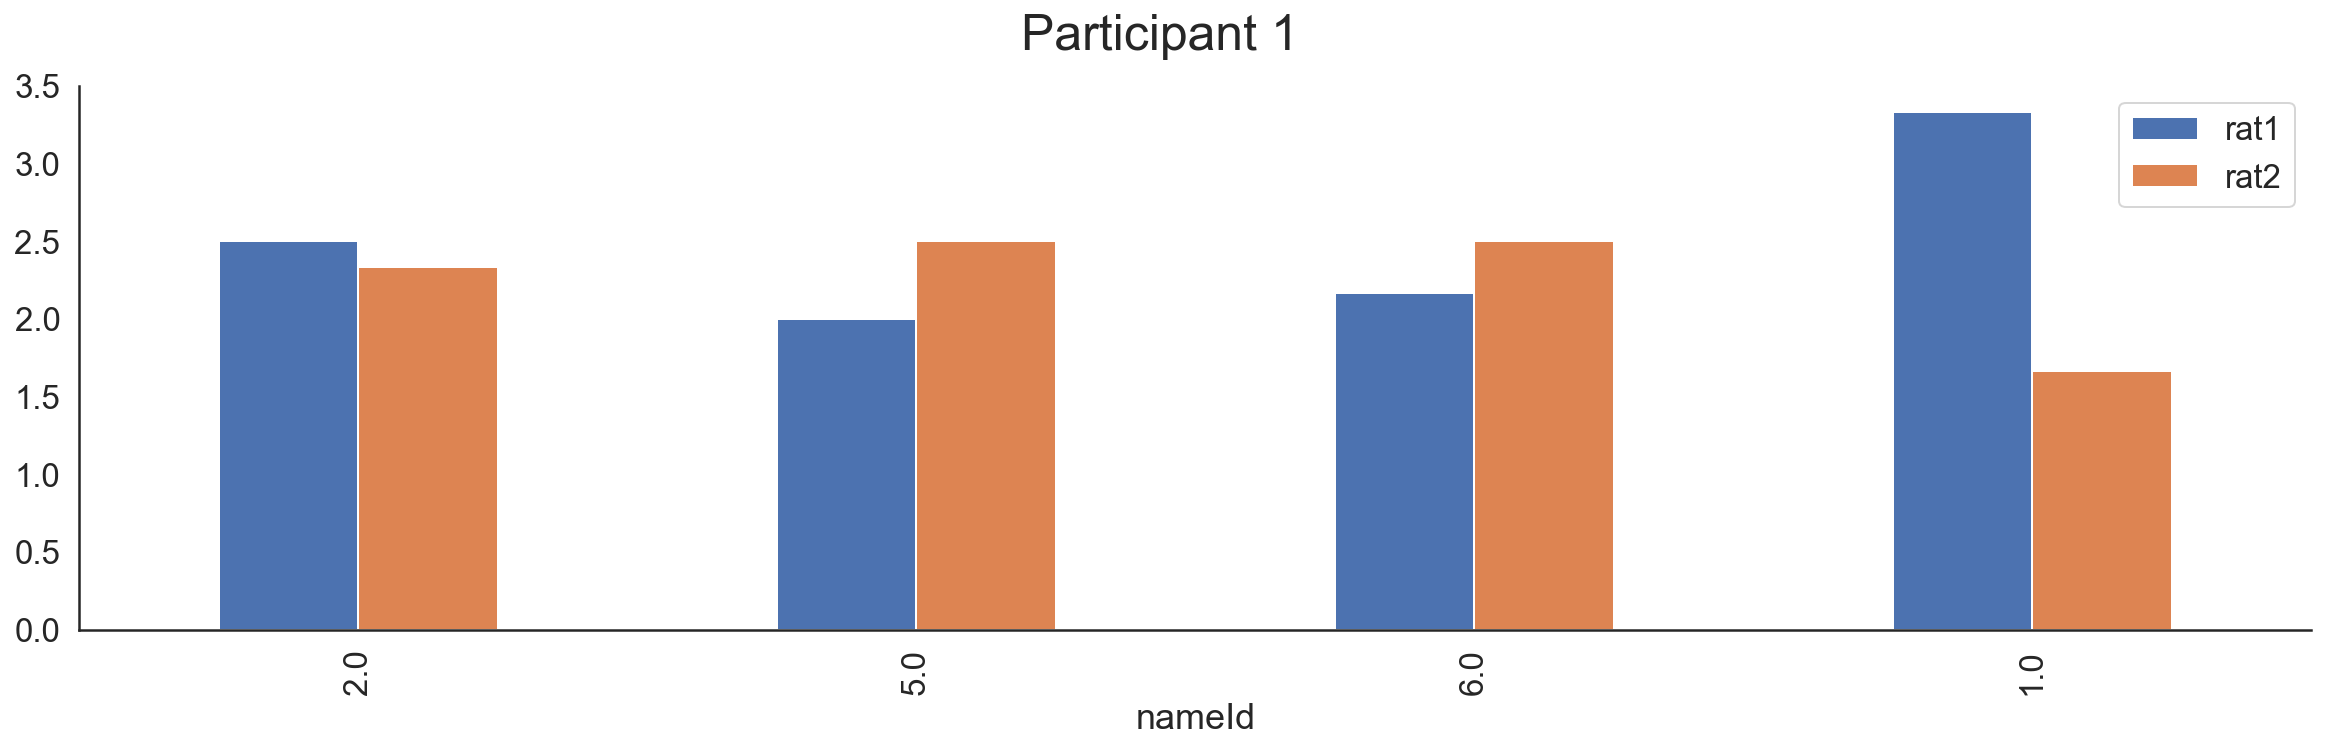

In [48]:
sns.set(font_scale=1.5, style='white')
ax = data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 1)].plot.bar(x='nameId',y=['rat1','rat2'], figsize=(20,5), )
plt.suptitle('Participant ' + str(1), fontsize = 25)

sns.despine()

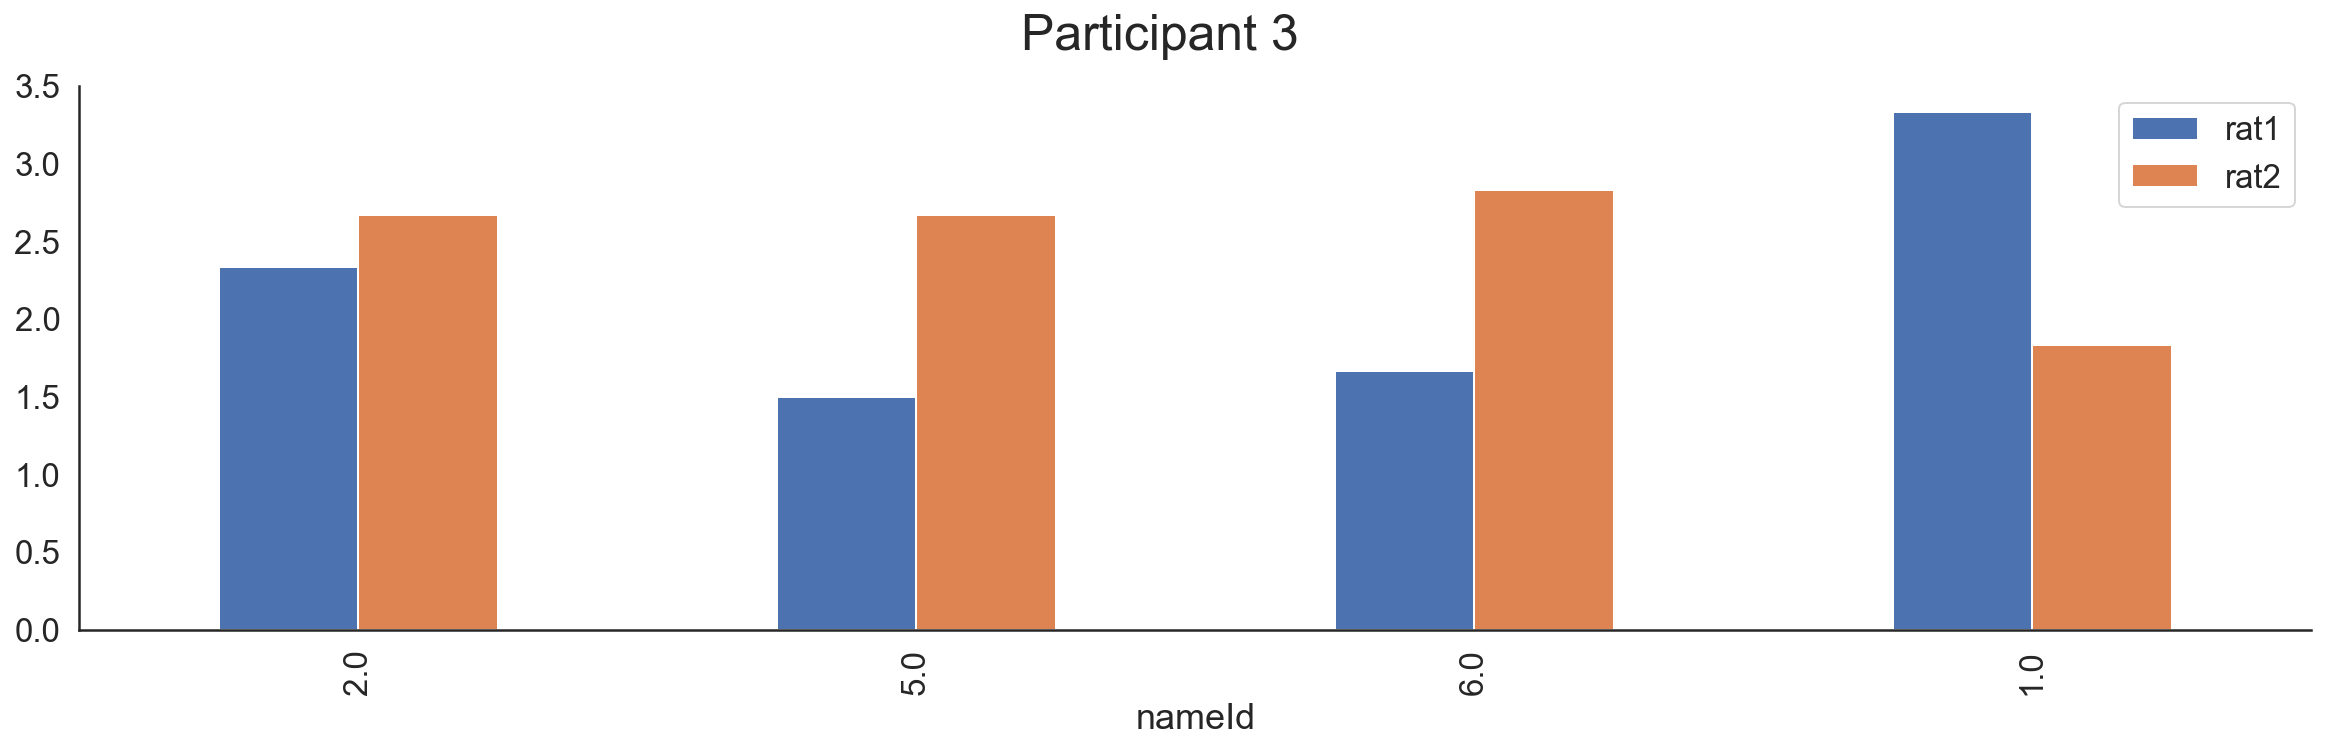

In [49]:
sns.set(font_scale=1.5, style='white')
ax = data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 3)].plot.bar(x='nameId',y=['rat1','rat2'], figsize=(20,5), )
plt.suptitle('Participant ' + str(3), fontsize = 25)

sns.despine()

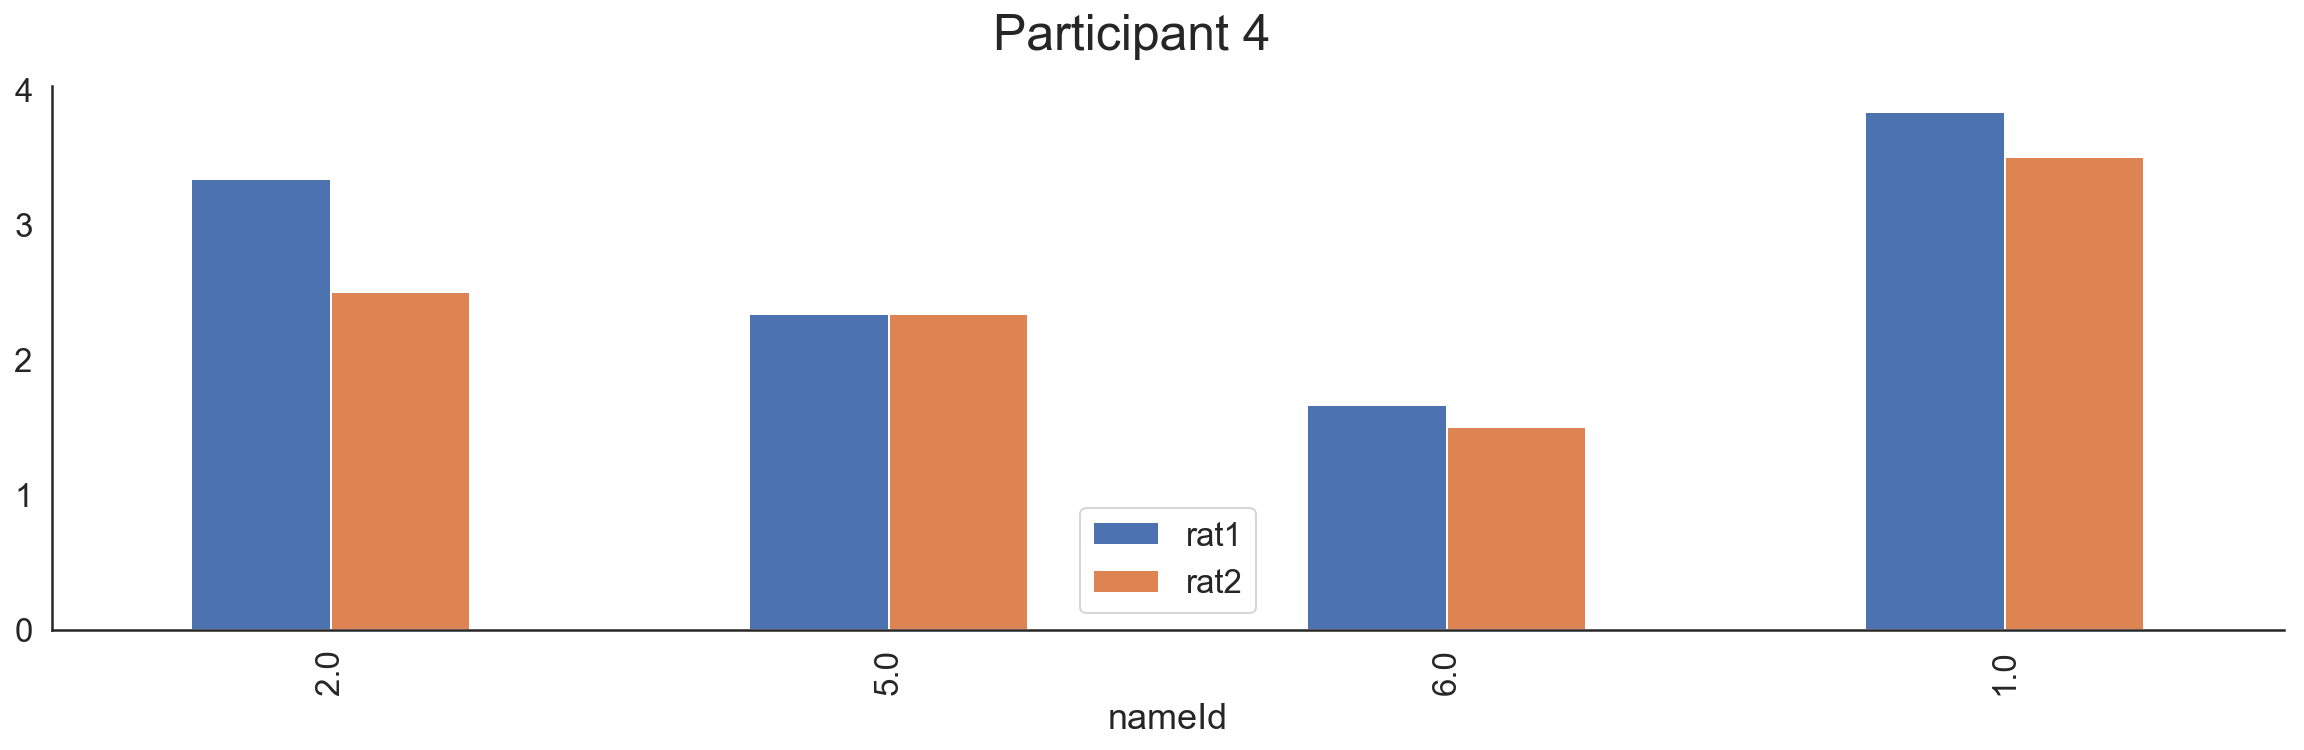

In [50]:
sns.set(font_scale=1.5, style='white')
ax = data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 4)].plot.bar(x='nameId',y=['rat1','rat2'], figsize=(20,5), )
plt.suptitle('Participant ' + str(4), fontsize = 25)

sns.despine()

## 2.reaction times for each participant in frame 1 (blue) and 2 (red)

participant: 0
RT frame 1: 4.033235248069382
RT frame 2: 4.094974113671326
participant: 1
RT frame 1: 4.200987702666653
RT frame 2: 4.156659207972211
participant: 2
RT frame 1: 3.9827509552917113
RT frame 2: 3.9697995660554977


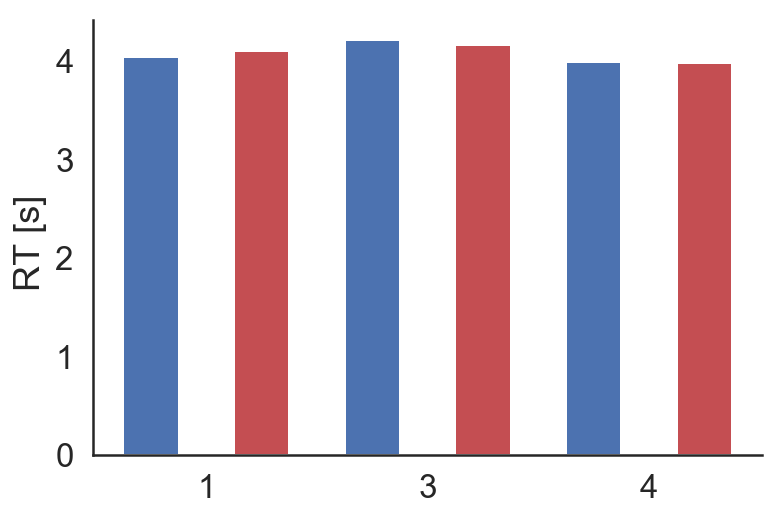

In [51]:
fig, ax = plt.subplots()
sns.set(font_scale=1.5, style='white')

width = 0.25
partNames = data_exp1.Part.unique()
for i in np.arange(len(partNames)):
    RT_mean1 = data_exp1.loc[(data_exp1['Part'] == partNames[i]) & (data_exp1['frame'] == 1) ].RT.mean()
    RT_mean2 = data_exp1.loc[(data_exp1['Part'] == partNames[i]) & (data_exp1['frame'] == 2) ].RT.mean()
    print ('participant: ' + str(i))
    print ('RT frame 1: ' + str(RT_mean1))
    print ('RT frame 2: ' + str(RT_mean2))
    plt.bar(i-0.25, RT_mean1,width,color='b', label = 'Like')
    plt.bar(i+0.25, RT_mean2,width,color='r', label = 'Dislike')

plt.xticks(range(len(partNames)), partNames)
plt.xlabel("")
plt.ylabel("RT [s] ")
#plt.xticks([i-0.5,i+0.5],["Like ","Dislike"], rotation=0, fontsize=25)
#plt.legend()
sns.despine()

## 3. participant densities rate 

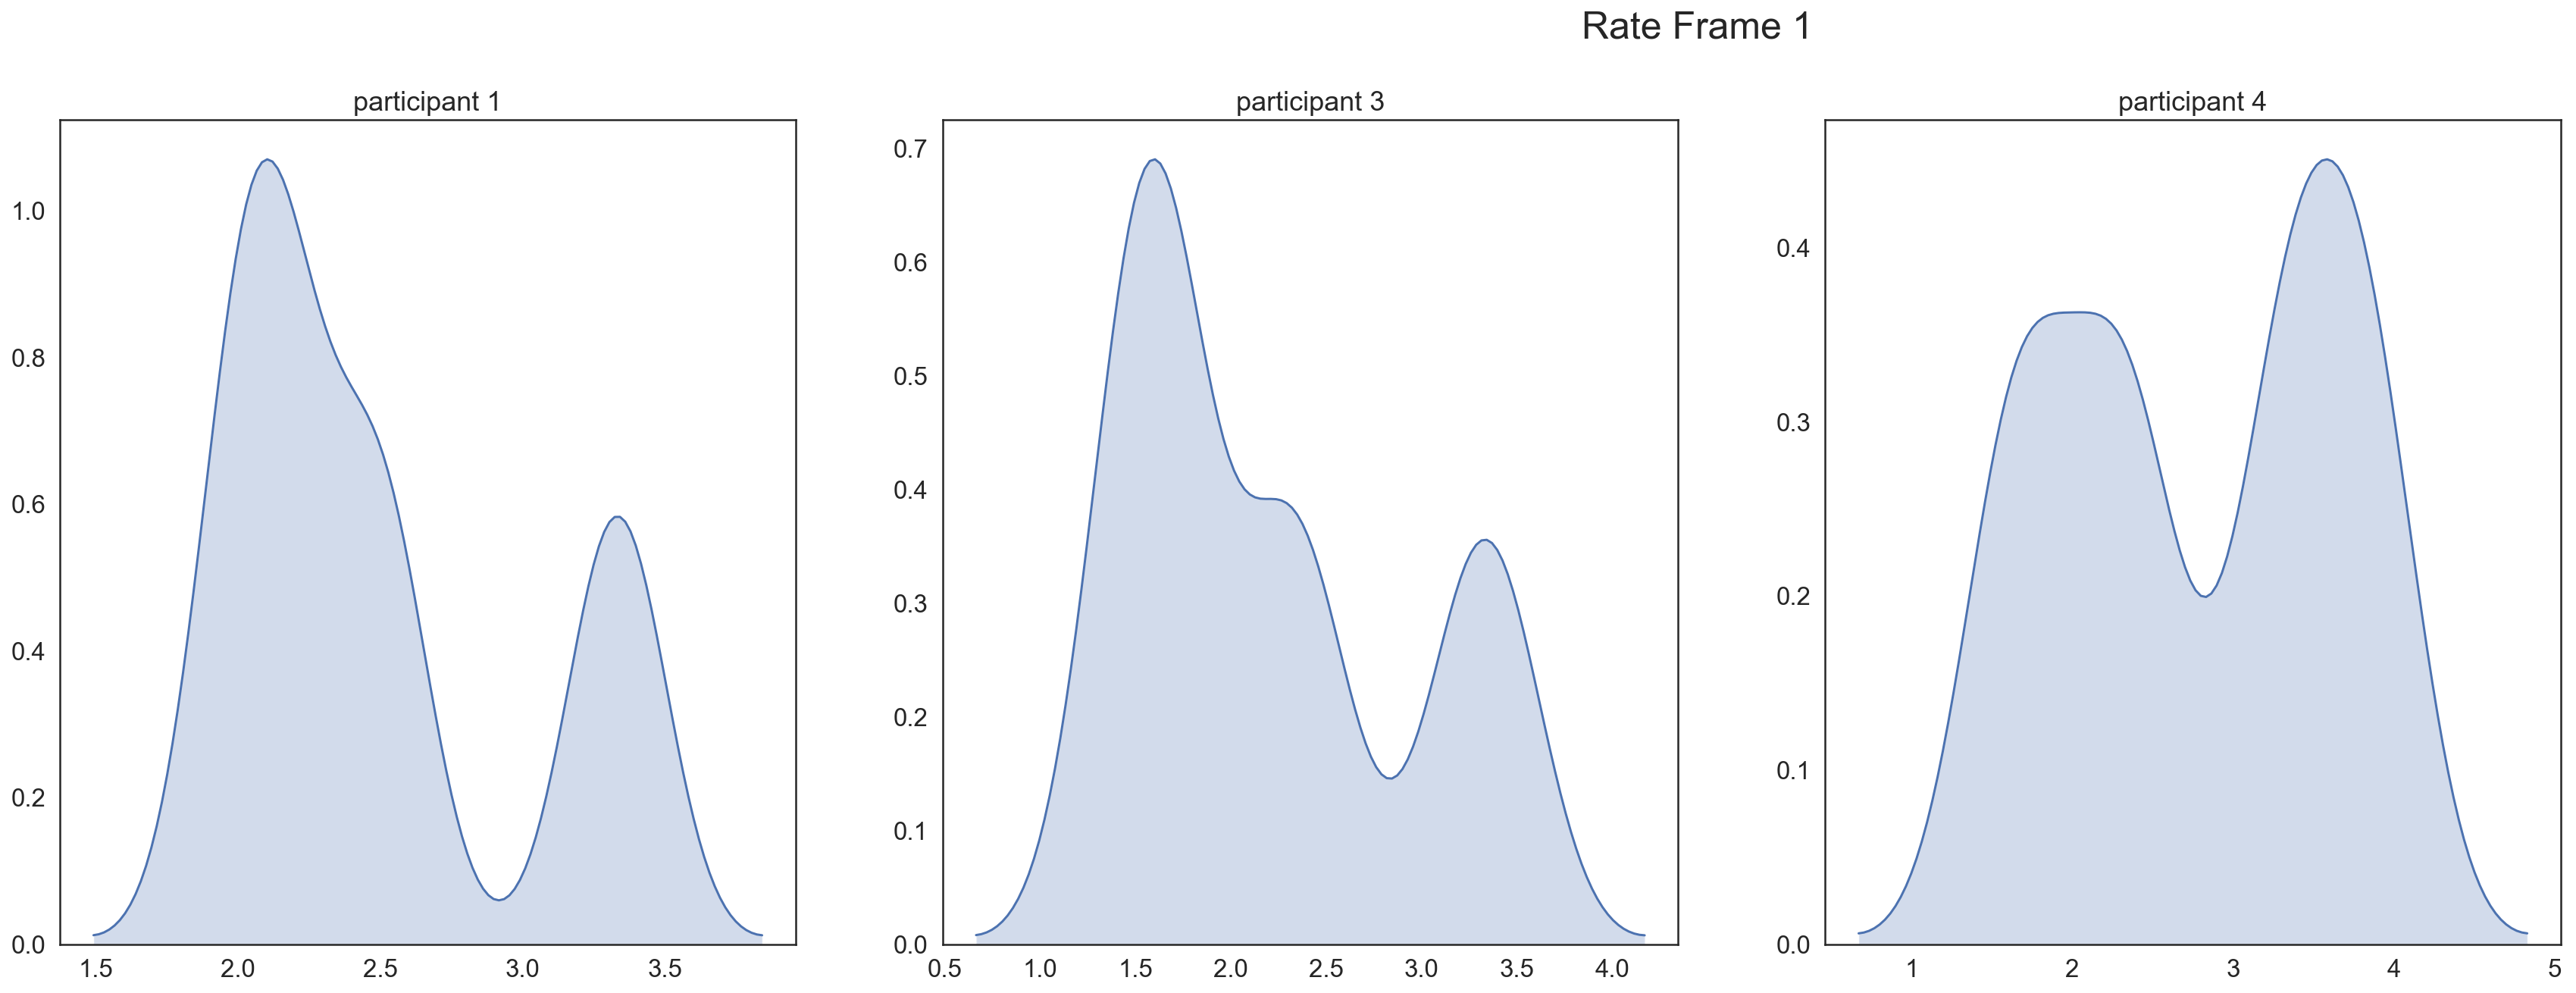

In [52]:
participant_densities(data_exp1,'RRat1', title = 'Rate Frame 1')

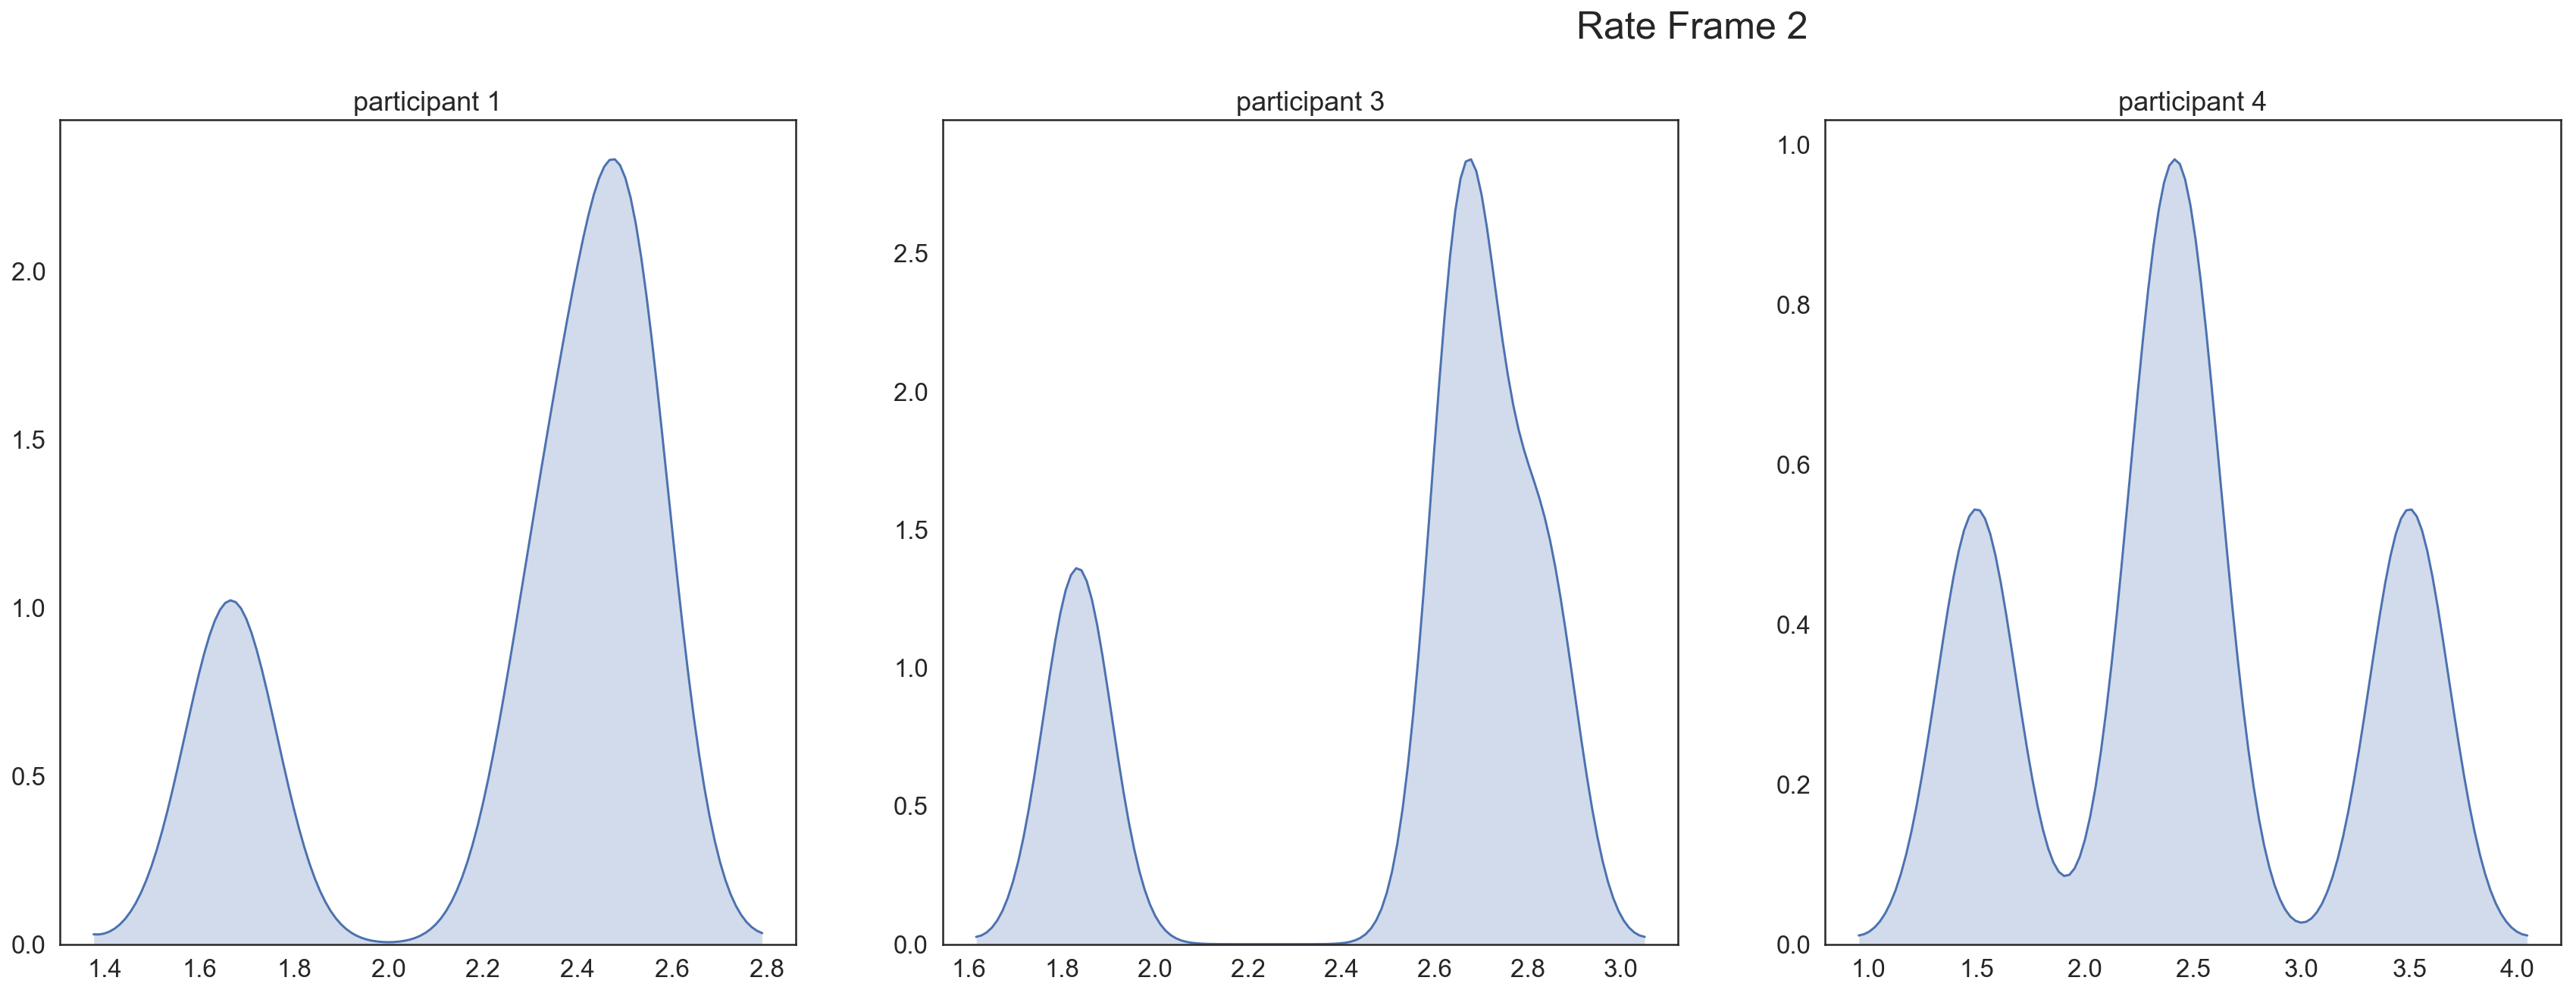

In [53]:
participant_densities(data_exp1,'RRat2', title = 'Rate Frame 2 ')

## 4. participants densities variability 
## (variability corresponds to the standard deviation of the ratings for each pet)

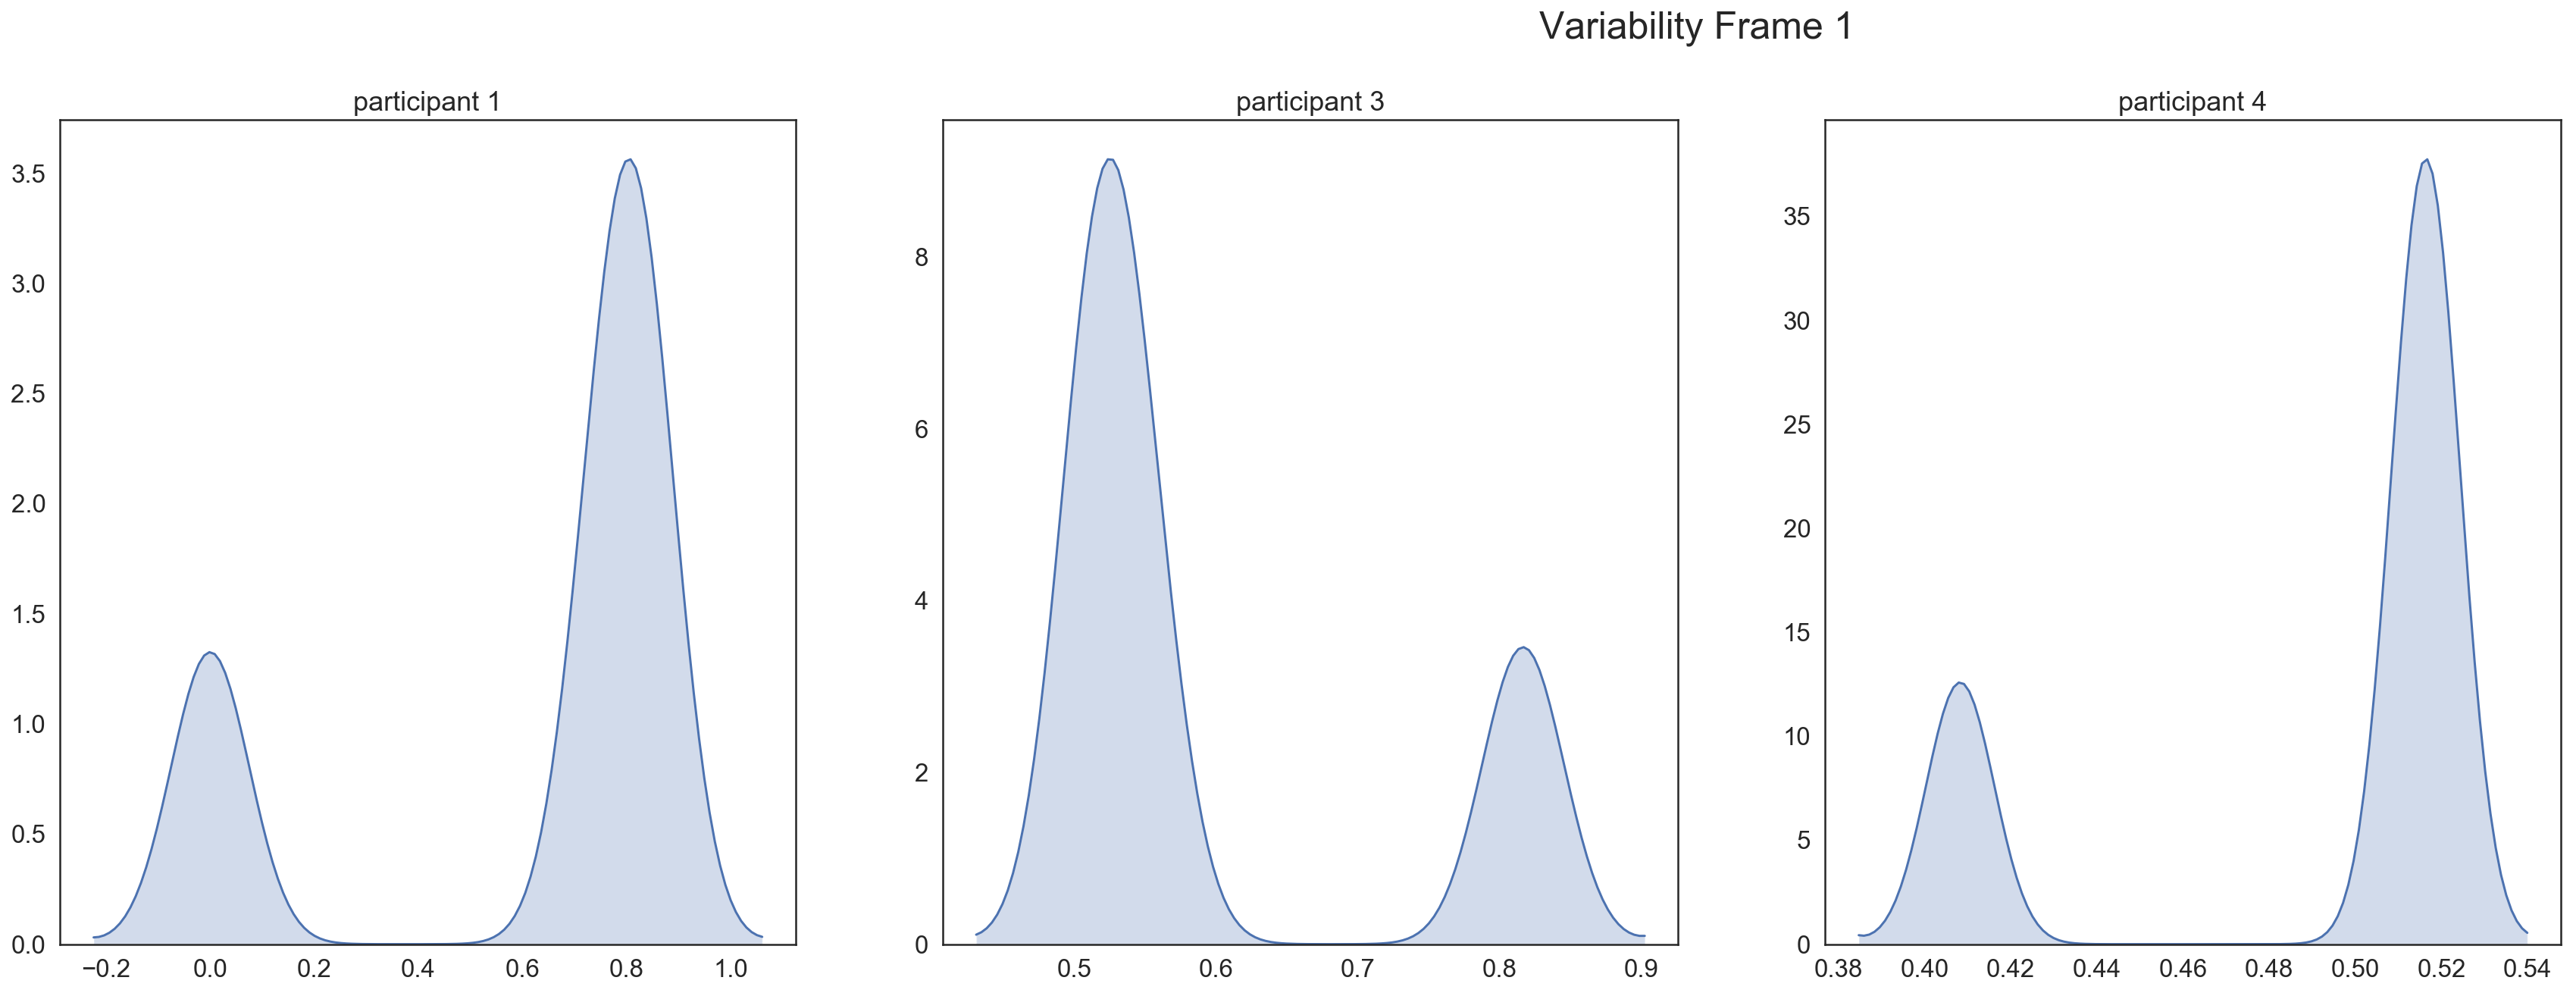

In [54]:
participant_densities(data_exp1,'RVar1', title = 'Variability Frame 1')

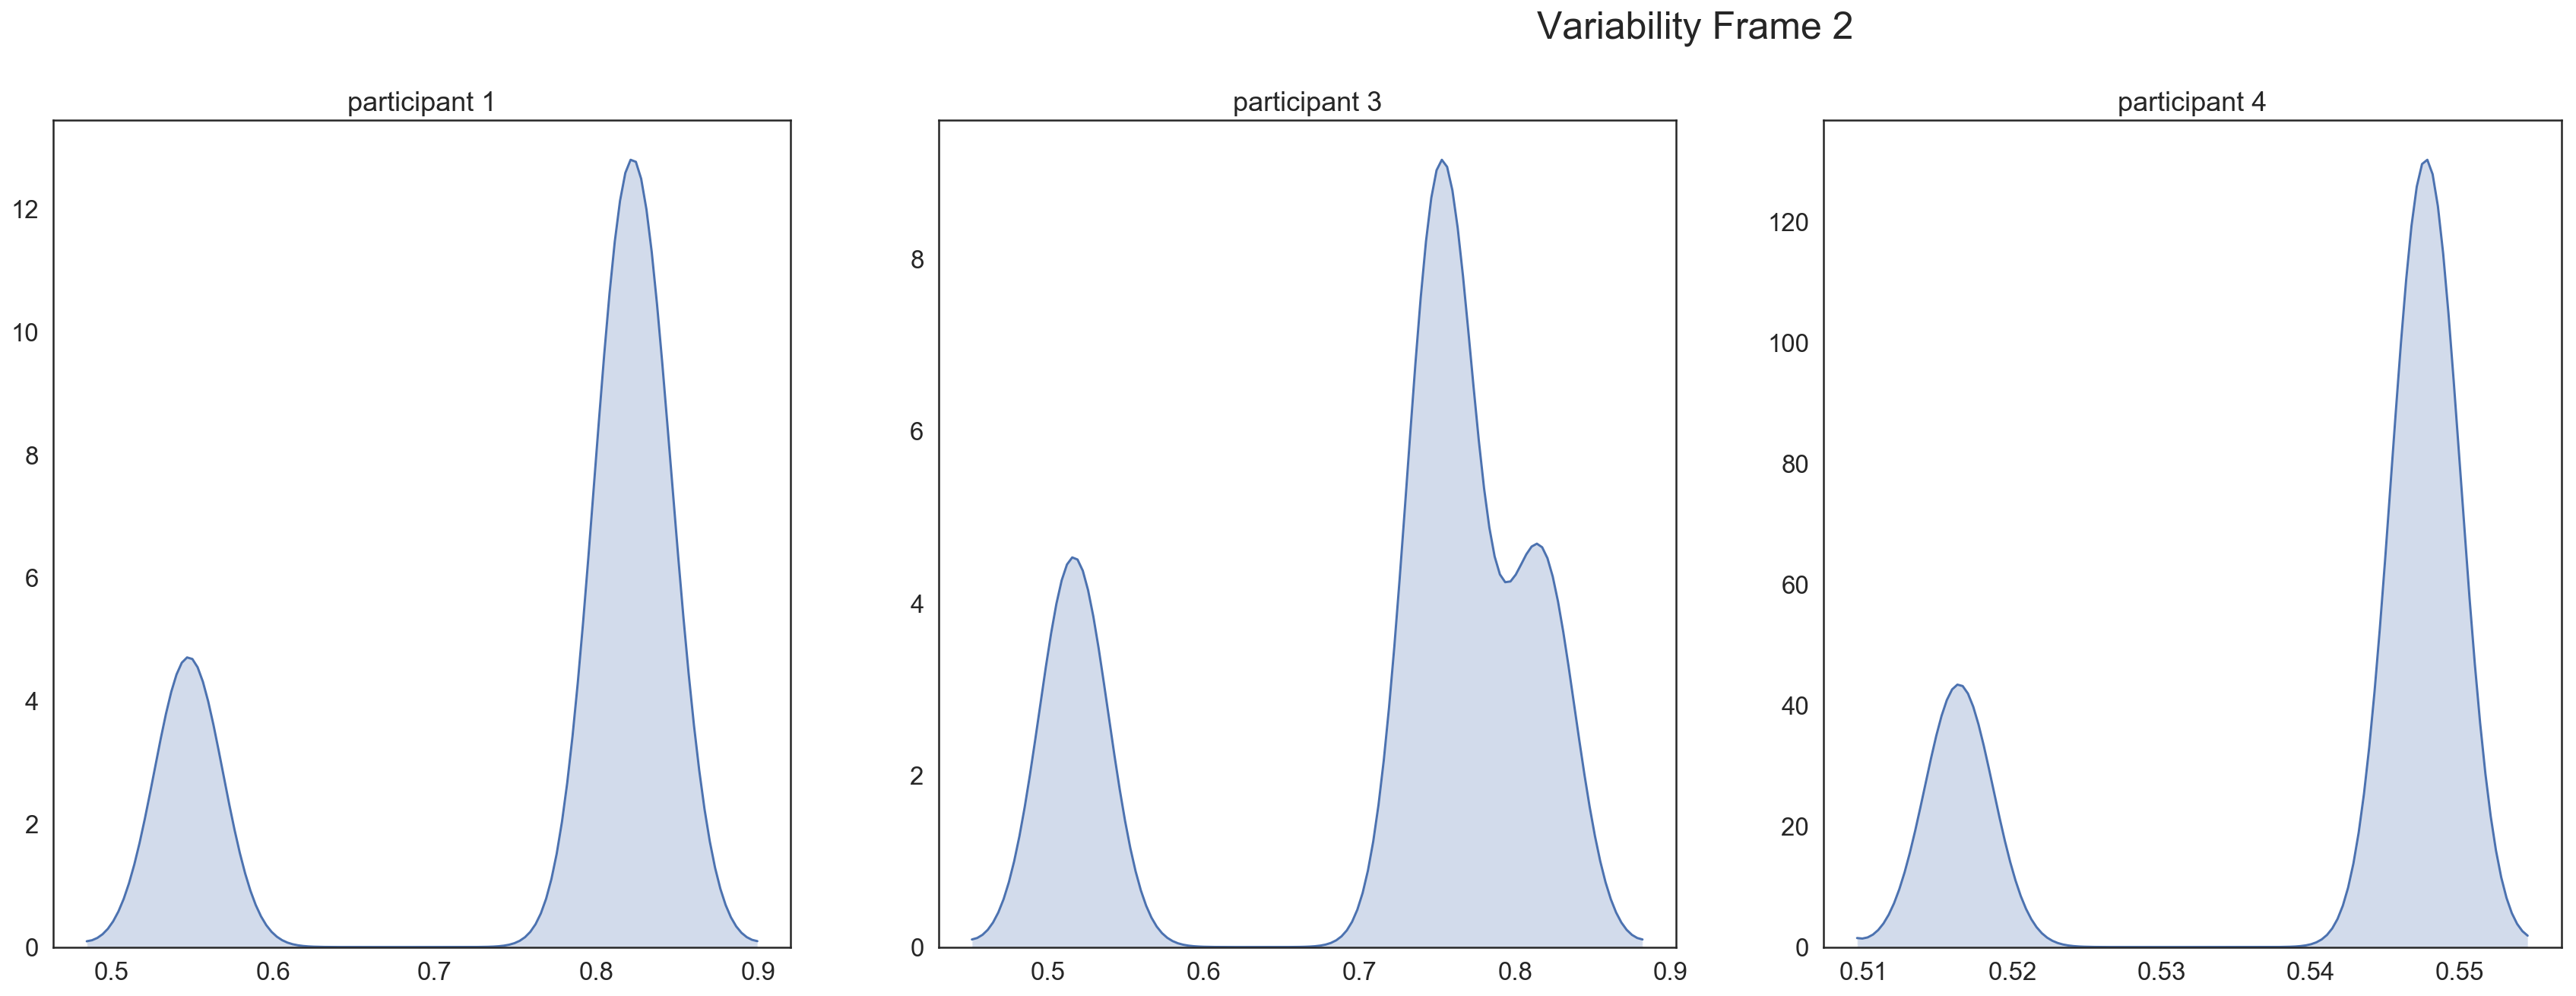

In [55]:
participant_densities(data_exp1,'RVar2', title = 'Variability Frame 2')

## 5. pet ratings in both frames
### each dot corresponds to a pet (4 pets) for each participant (3 participant)

Pearson's r = 0.101 p =  0.754


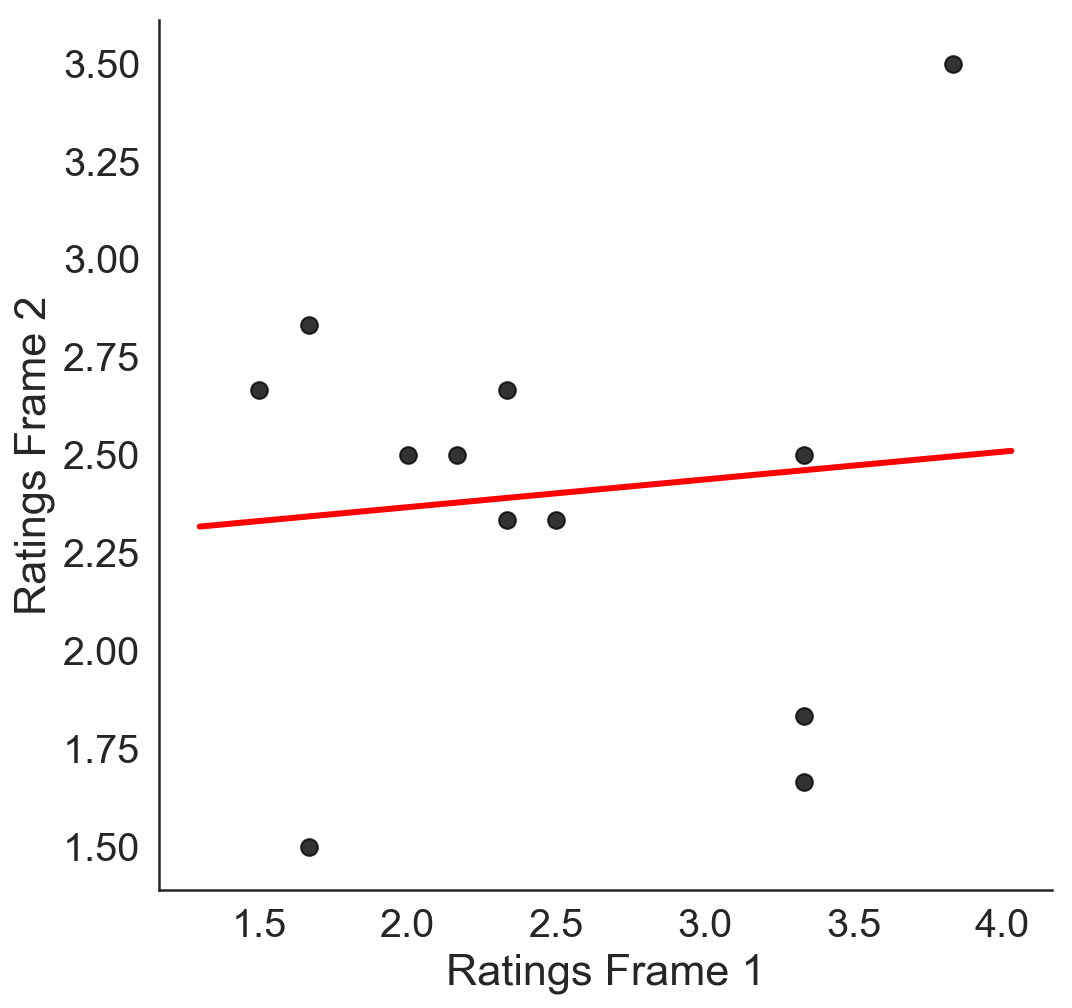

In [56]:
corrPlotSimple(data_exp_ratings_2, 'rat1','Ratings Frame 1','rat2','Ratings Frame 2')

## 6. variability (std dev) of ratings for each pet in both frames 
### (frame 1: like; frame 2: dislike) 

Pearson's r = 0.669 p =  0.017


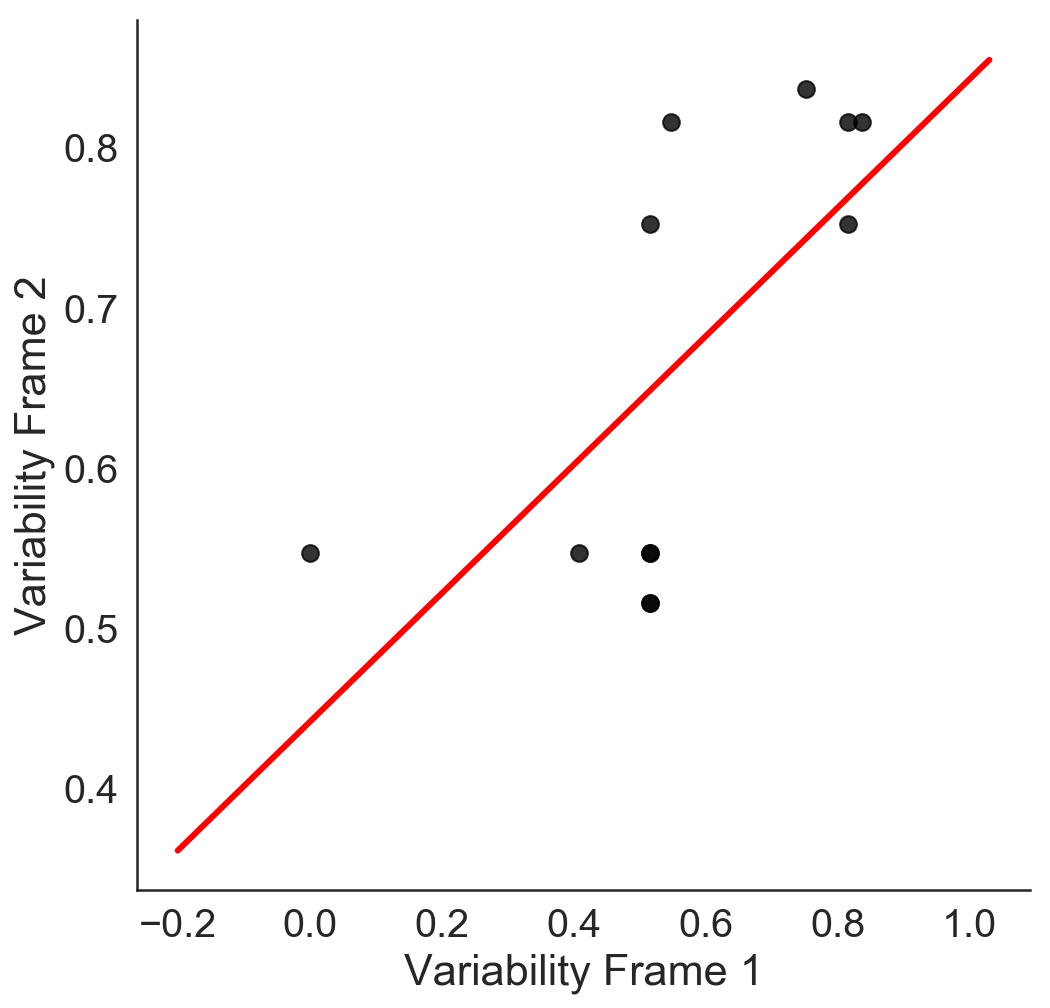

In [57]:
corrPlotSimple(data_exp_ratings_2, 'var1','Variability Frame 1','var2','Variability Frame 2')

## 7. relationship between rating and variability.

Pearson's r = 0.254 p =  0.426


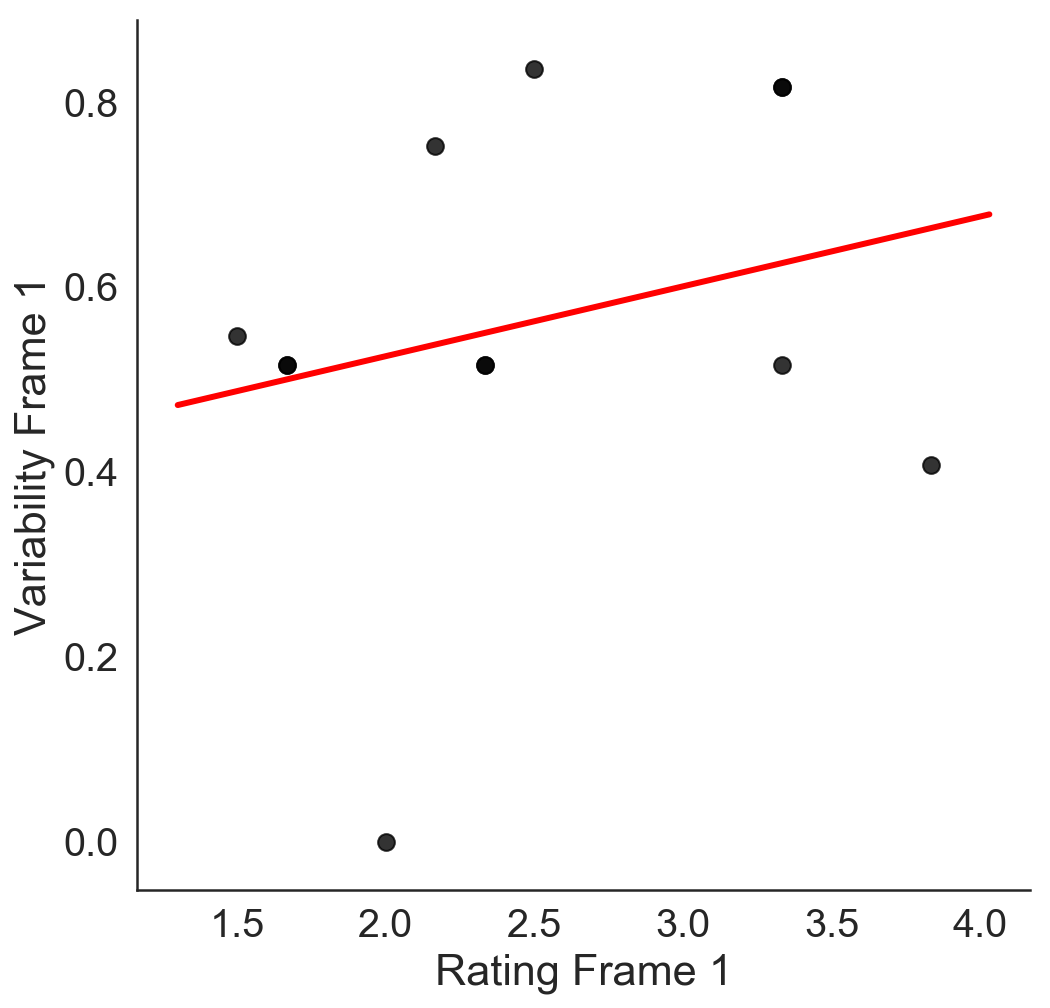

In [58]:
corrPlotSimple(data_exp_ratings_2, 'rat1','Rating Frame 1','var1','Variability Frame 1')

Pearson's r = -0.183 p =  0.569


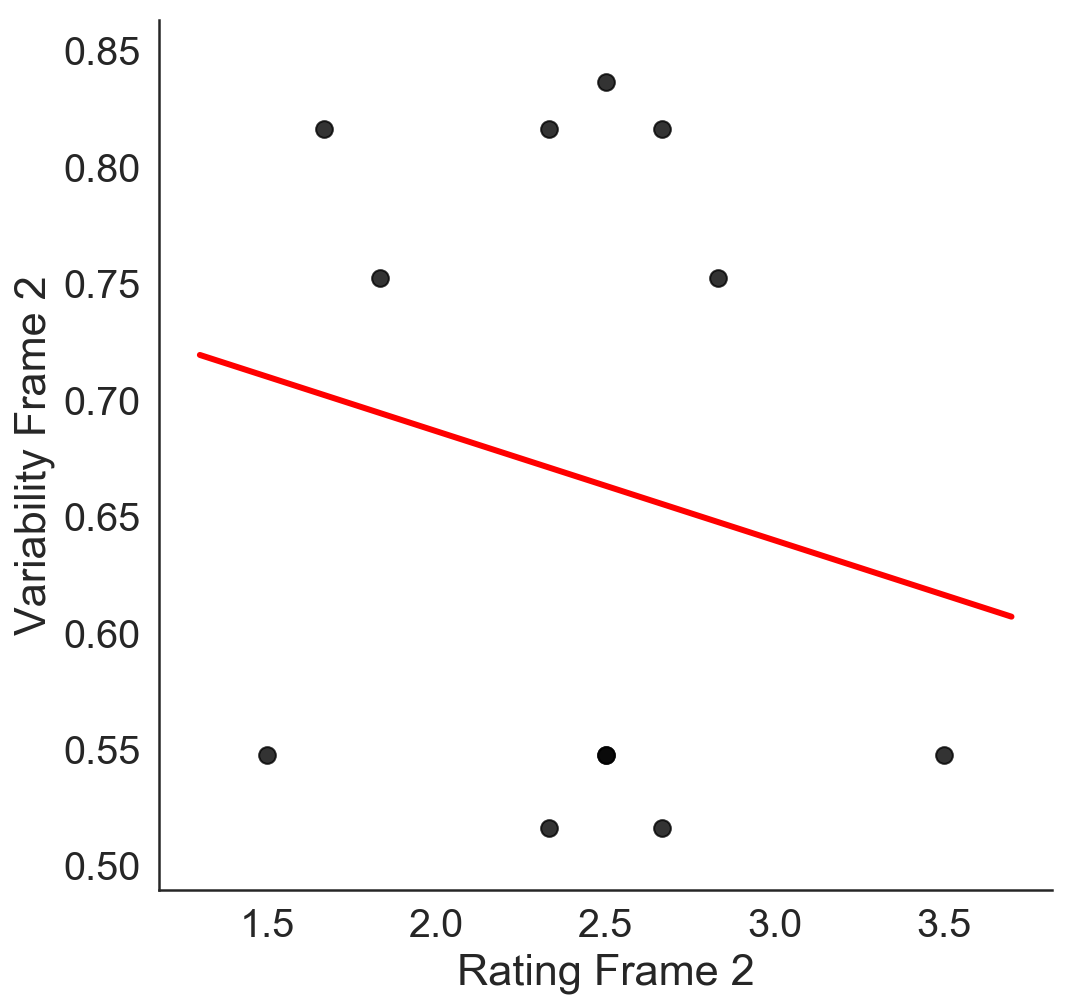

In [59]:
corrPlotSimple(data_exp_ratings_2, 'rat2','Rating Frame 2','var2','Variability Frame 2')

### *** bottomline: the more liked the pet, less variable are the ratings

## 8. I created an index of partiallity ( how much I like/dislike something, with 0 representing indifference and 2.5 representing absolute like/dislike for that animal)

In [60]:
# if we adapt the rating scale to leave value 2.5 at the center of the scale (0) we can characterize the level of indifference that the animal generates
data_exp_ratings_2['partiality1'] = np.abs(data_exp_ratings_2.rat1-2.5)
data_exp_ratings_2['partiality2'] = np.abs(data_exp_ratings_2.rat2-2.5)

Pearson's r = -0.149 p =  0.644
Pearson's r = -0.055 p =  0.865


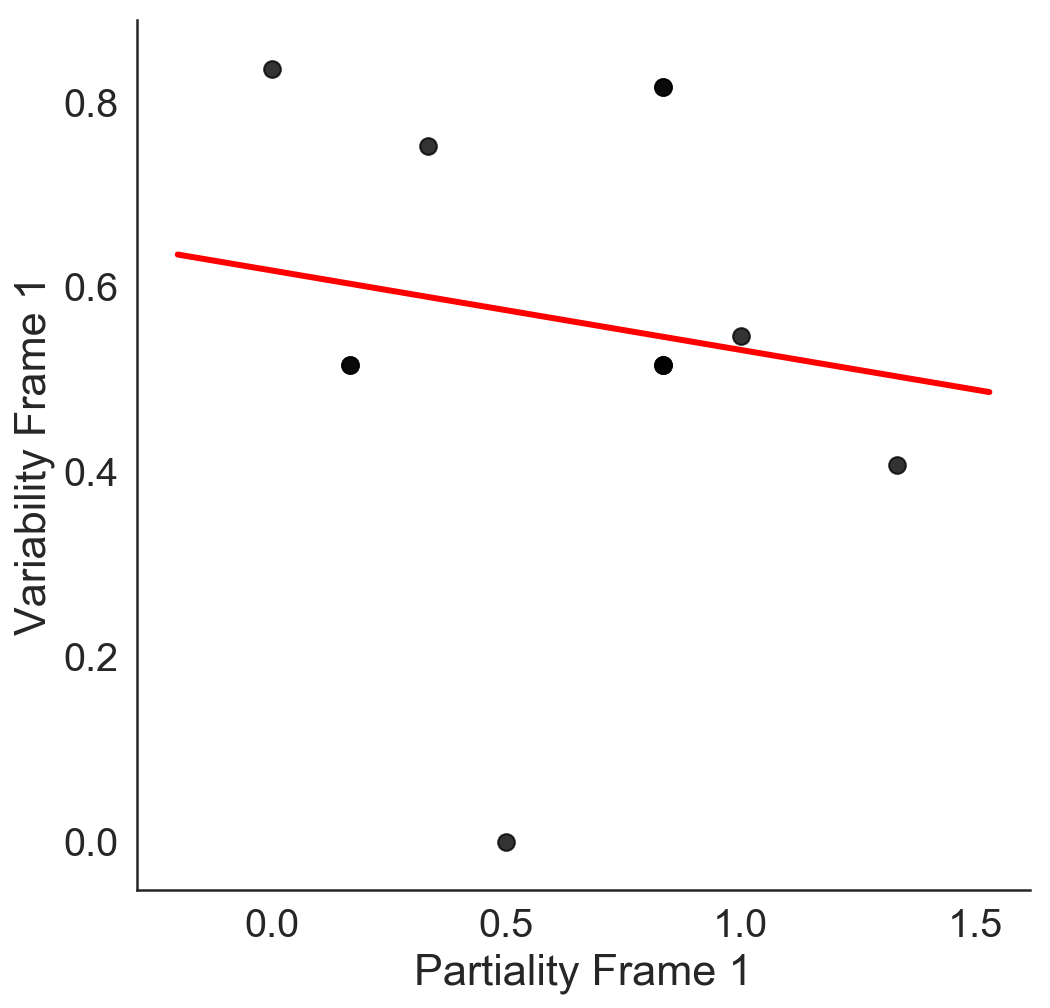

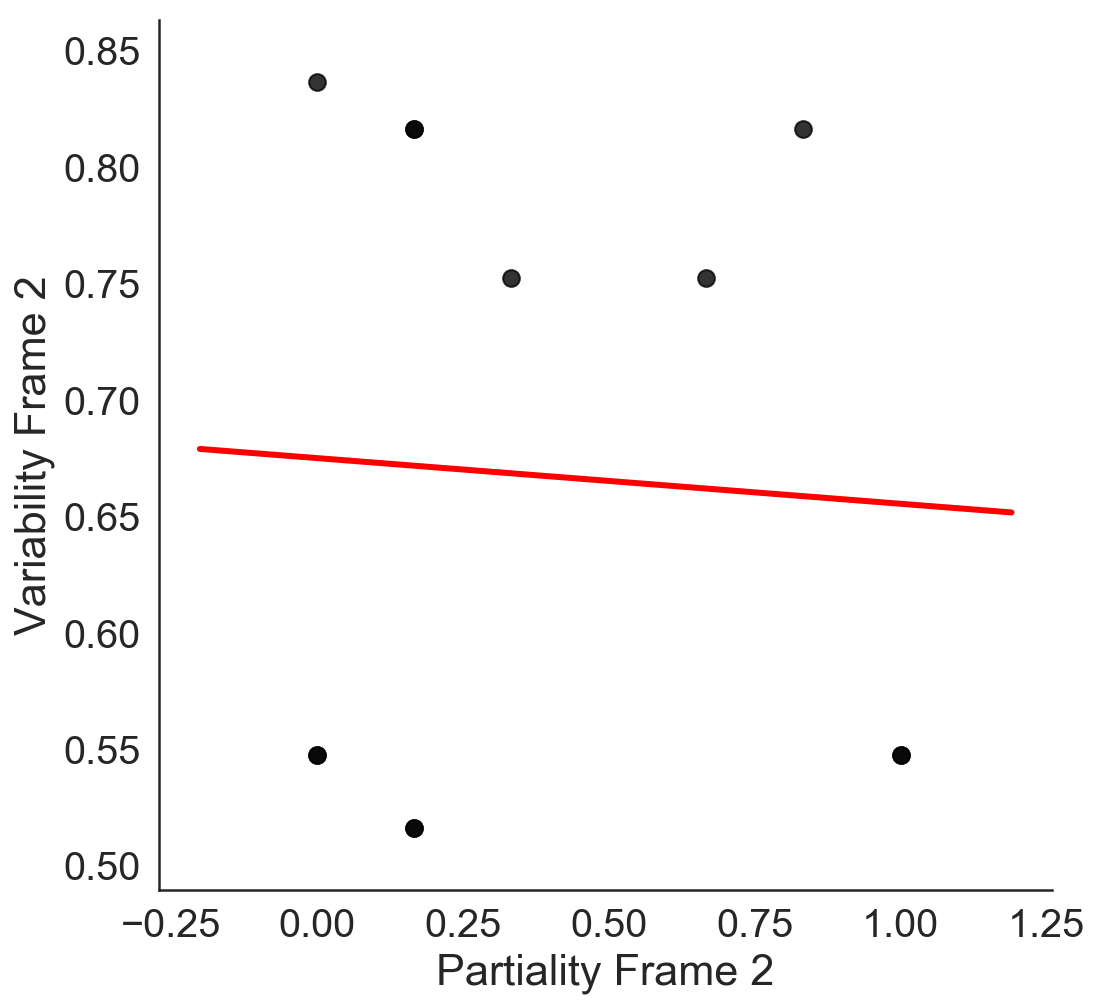

In [61]:
corrPlotSimple(data_exp_ratings_2, 'partiality1','Partiality Frame 1','var1','Variability Frame 1')
corrPlotSimple(data_exp_ratings_2, 'partiality2','Partiality Frame 2','var2','Variability Frame 2')

### 

## 9. example ratings for each pet in one participant

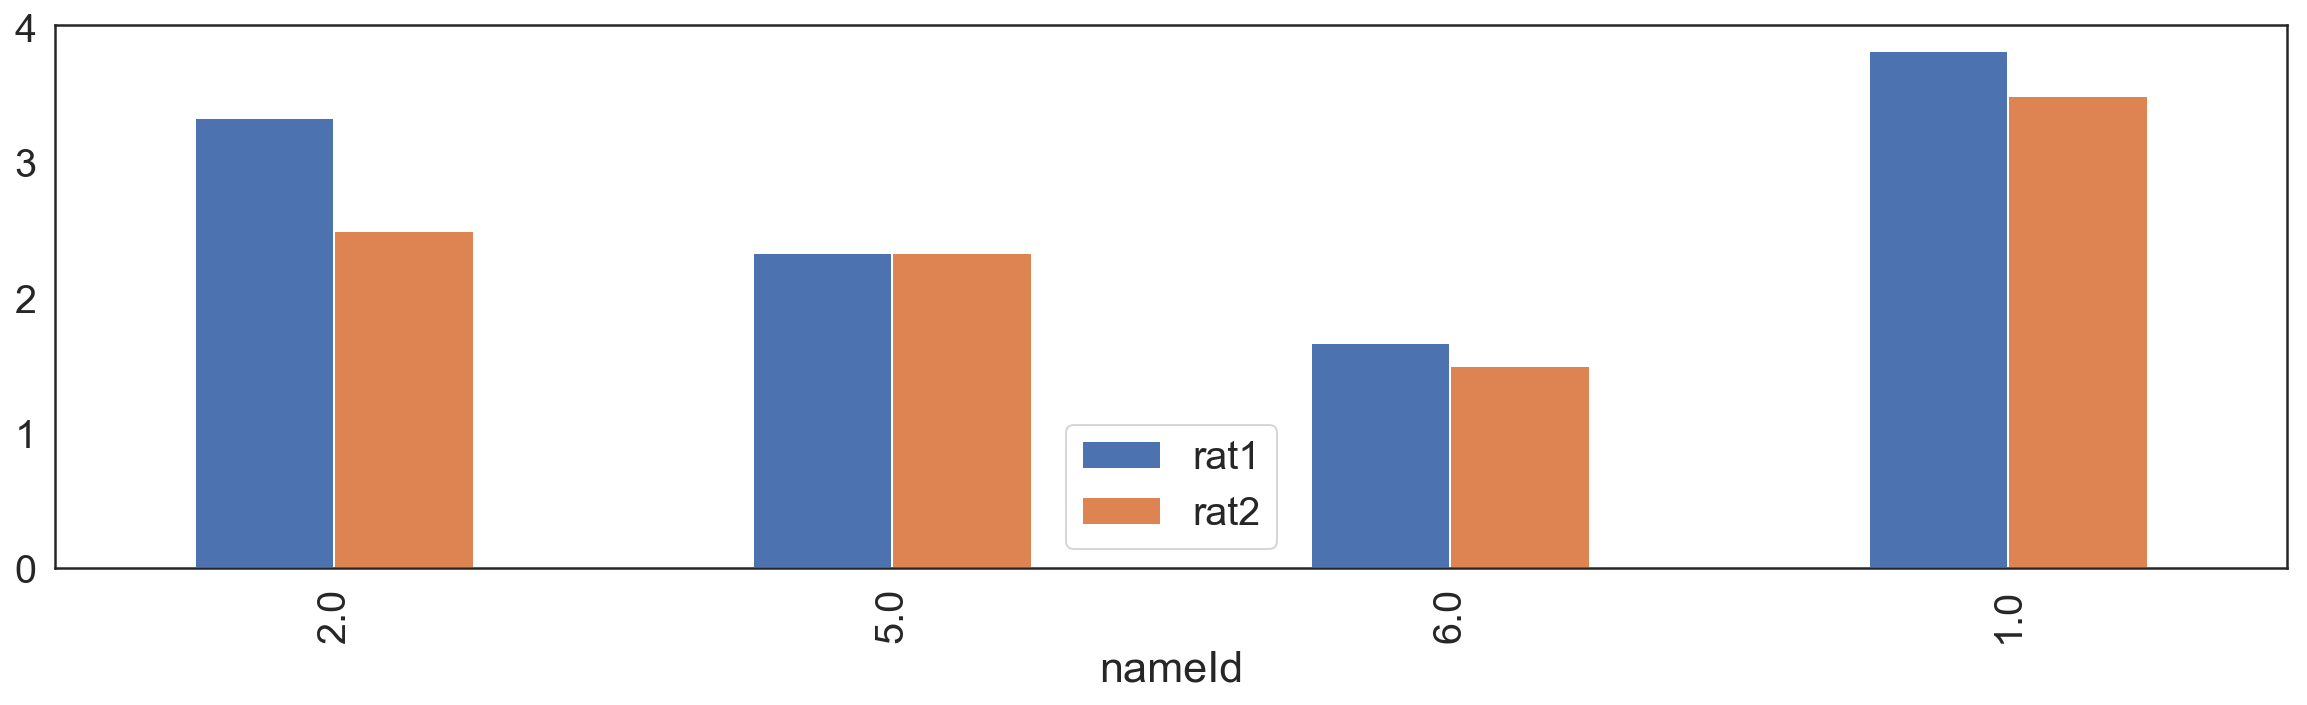

In [62]:
ax = data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 4)].plot.bar(x='nameId',y=['rat1','rat2'], figsize=(20,5), )


### **Note**: participant 4 doesn't report ratings for dislike correctly

## 10. example ratings  for each pet for all participants

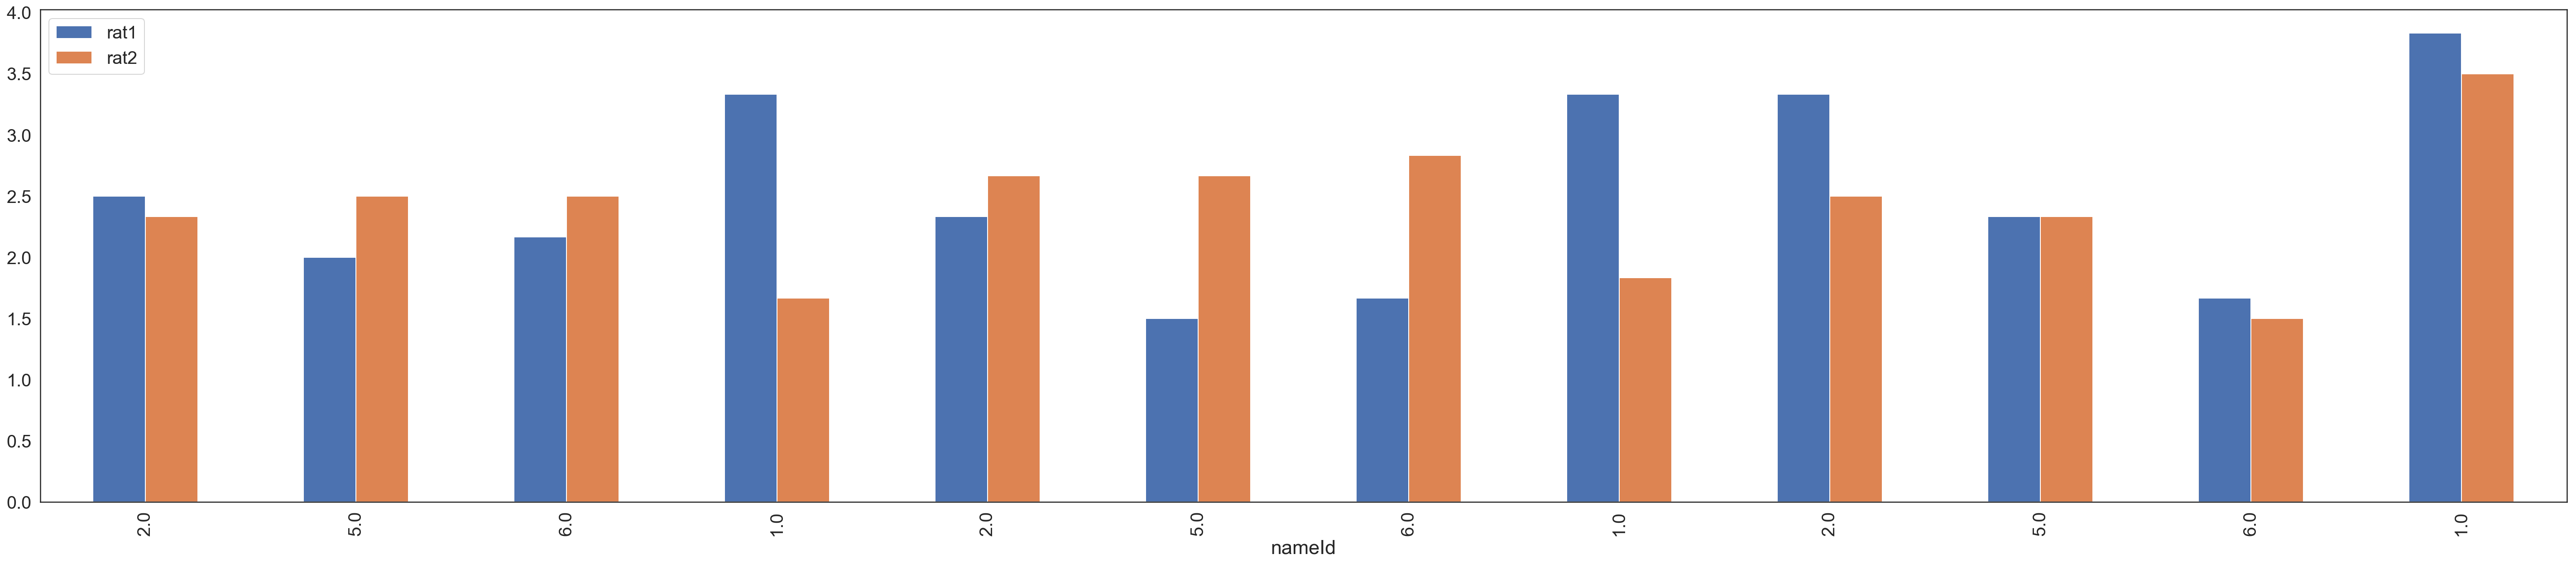

In [63]:
data_exp_ratings_2.plot.bar(x='nameId',y=['rat1','rat2'], figsize=(50,10))

#  Choice data analysis
-----------------------------------------------------------------------

## 1. data visualization

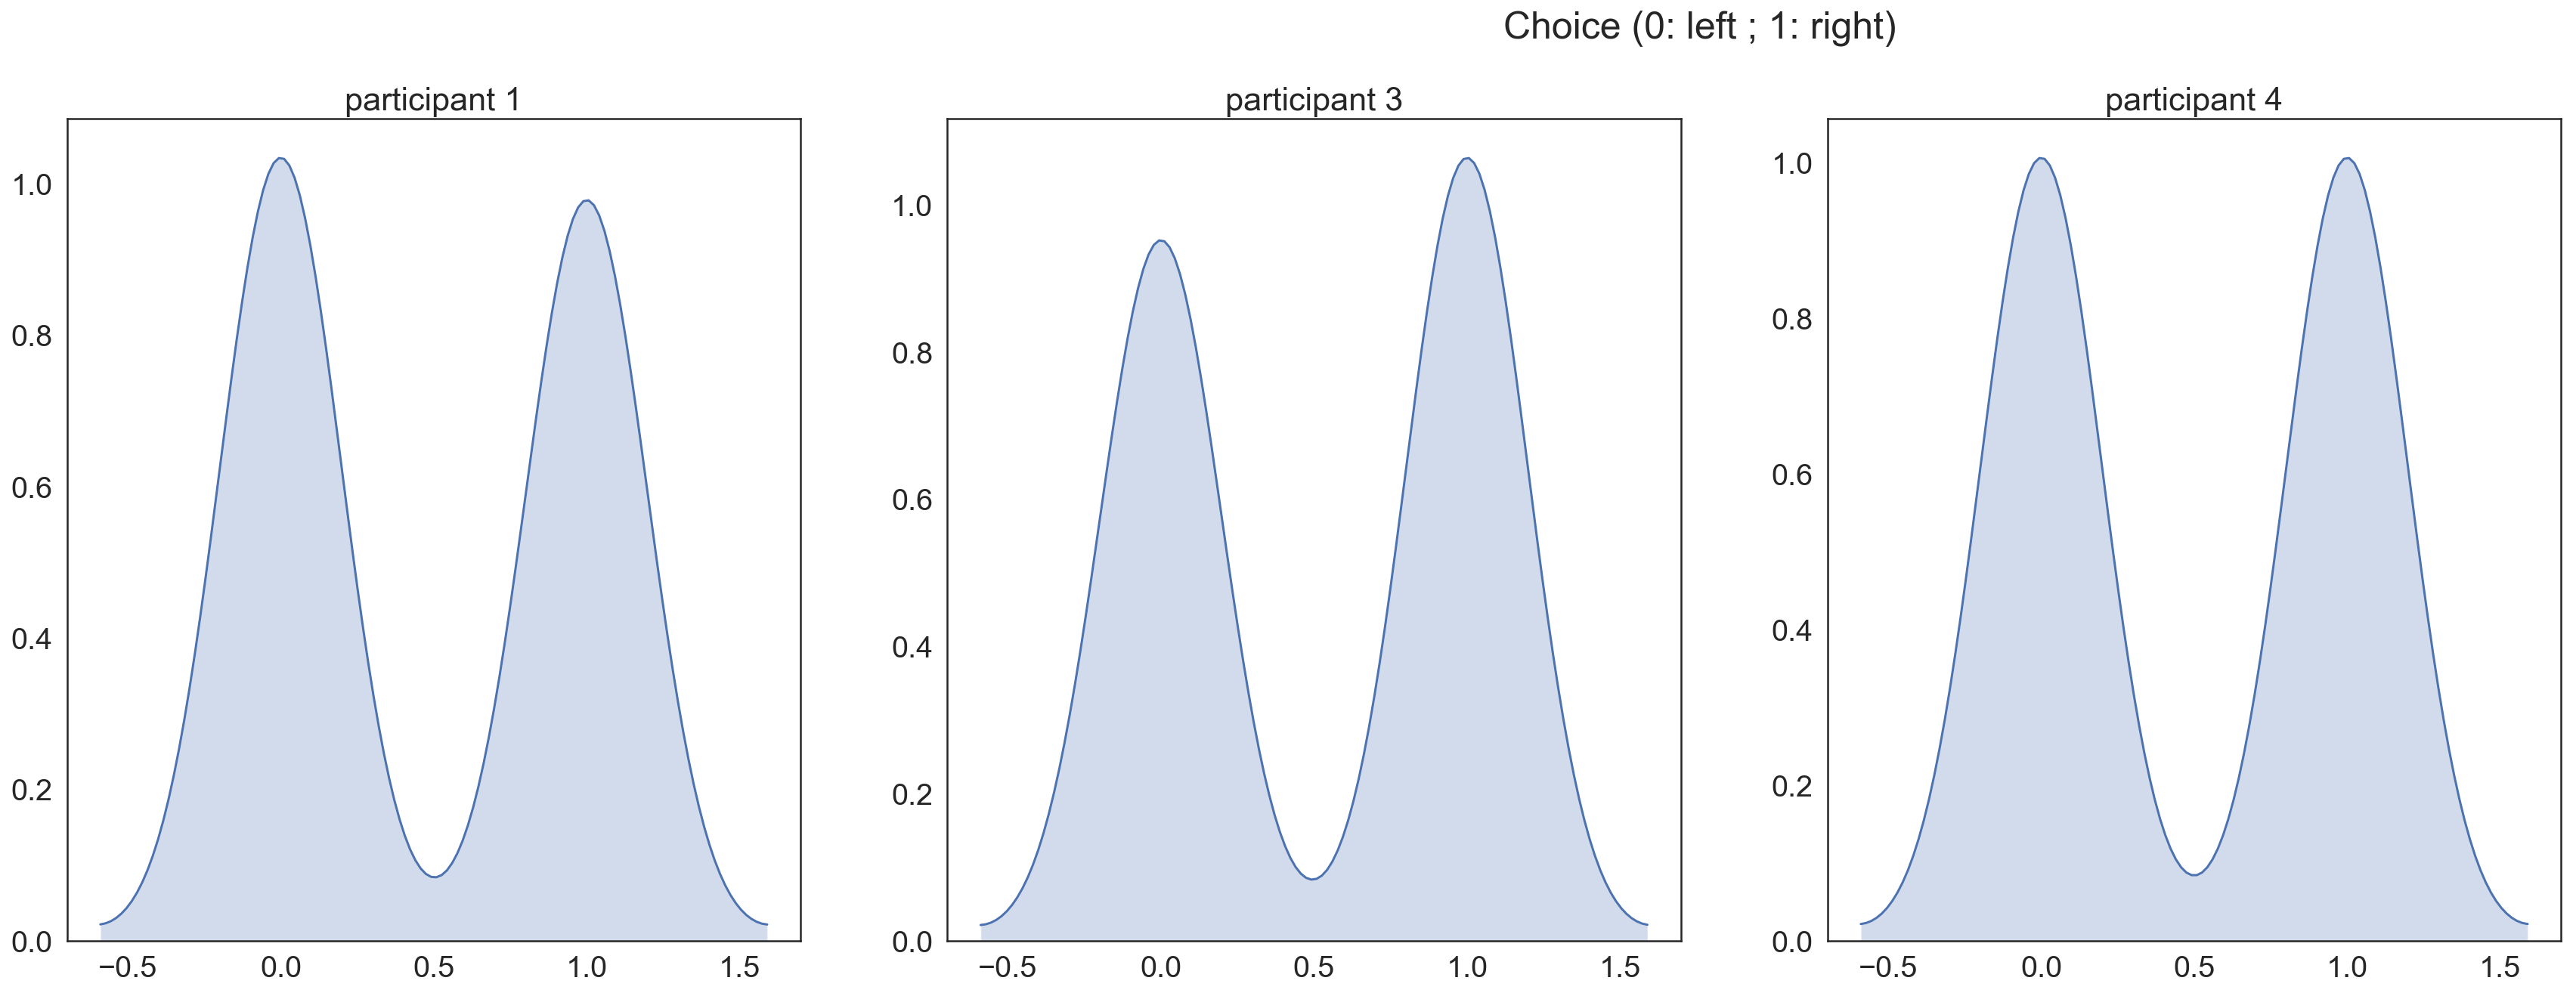

In [64]:
participant_densities(data_exp1,'choices', title = 'Choice (0: left ; 1: right)')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


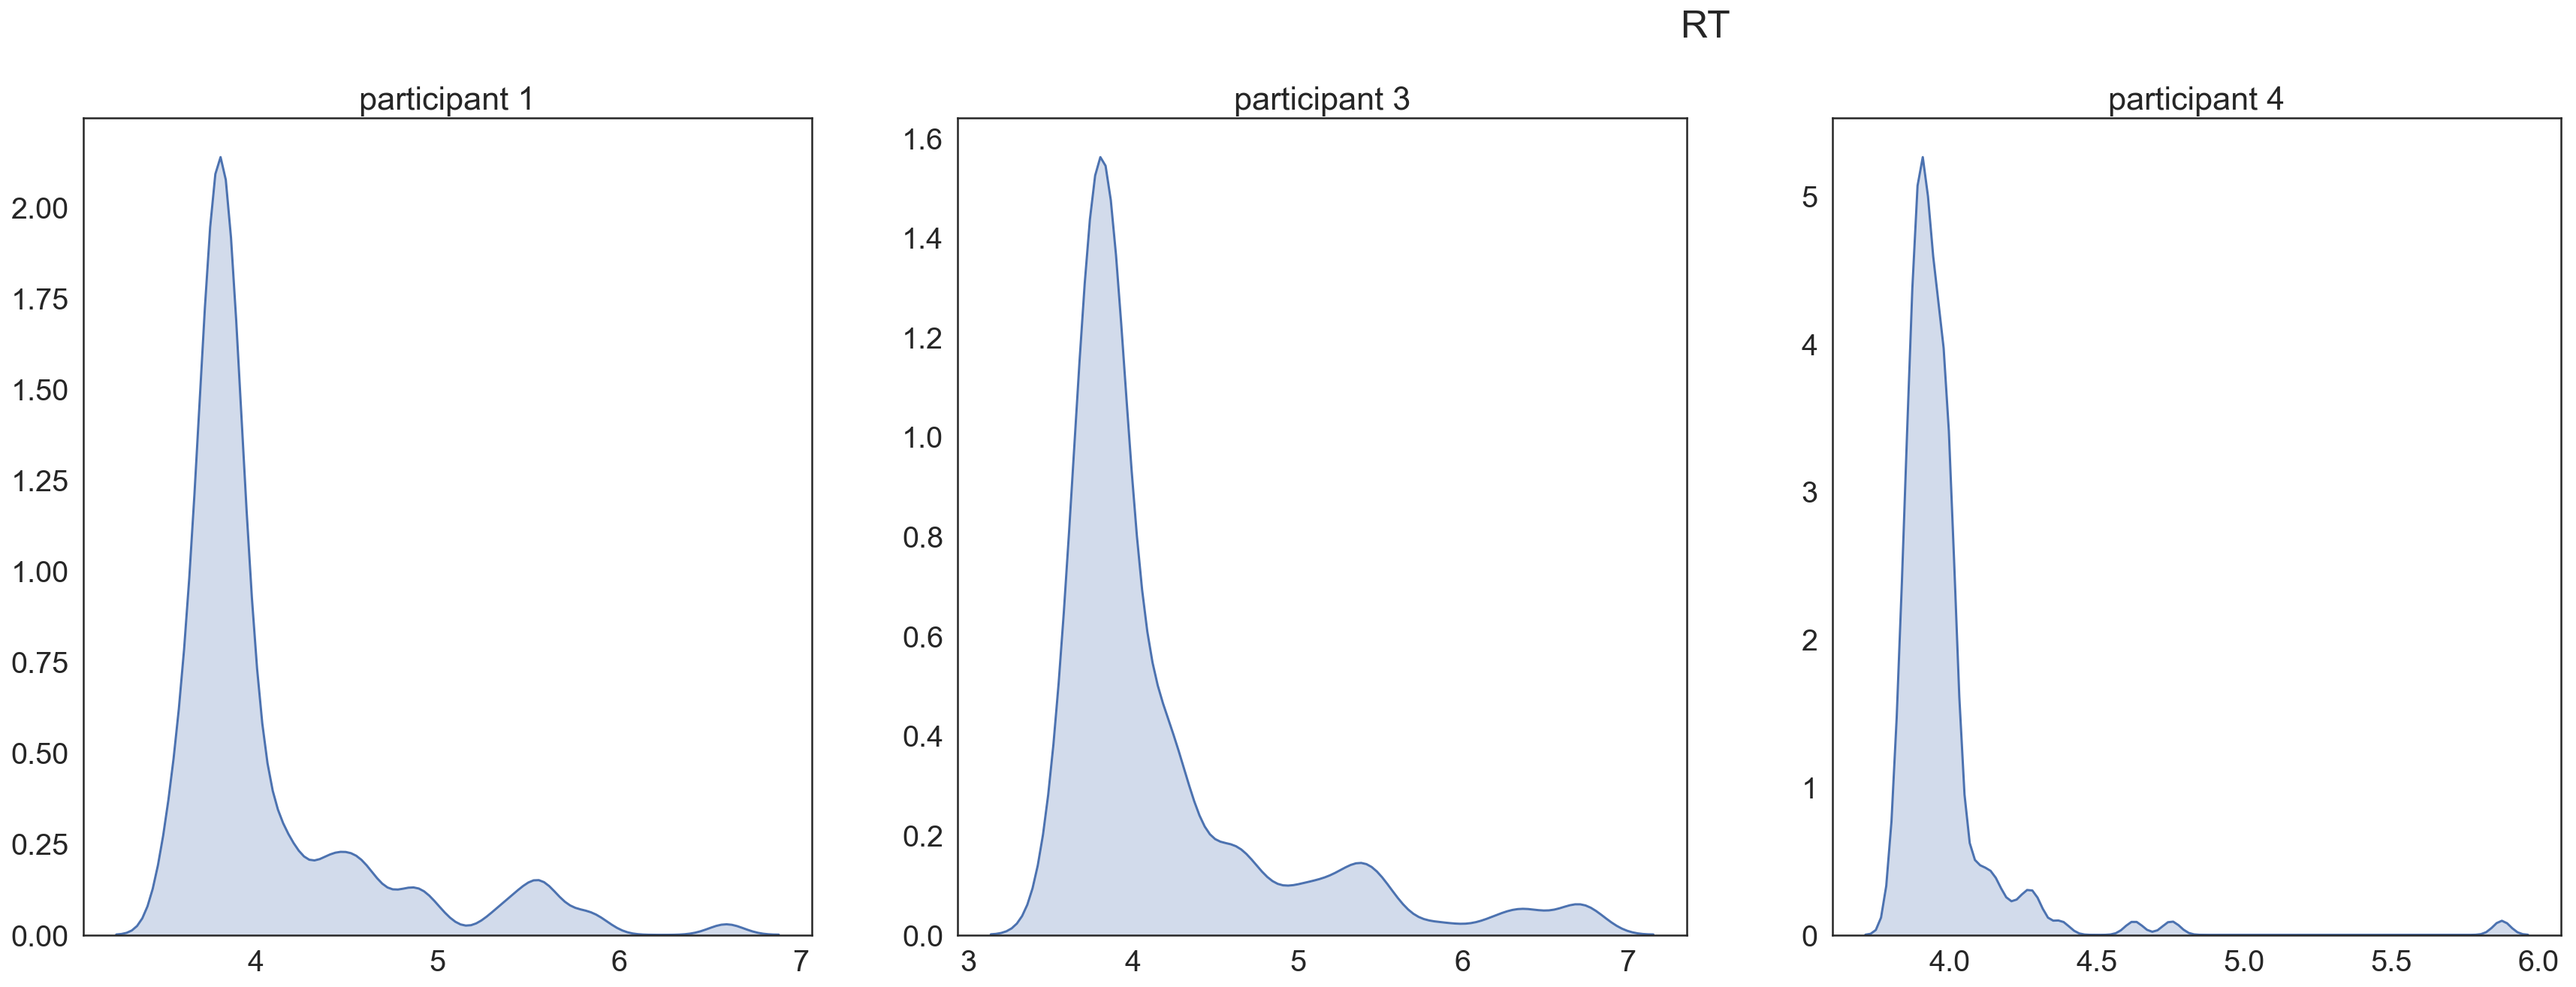

In [65]:
participant_densities(data_exp1,'RT',title = 'RT')

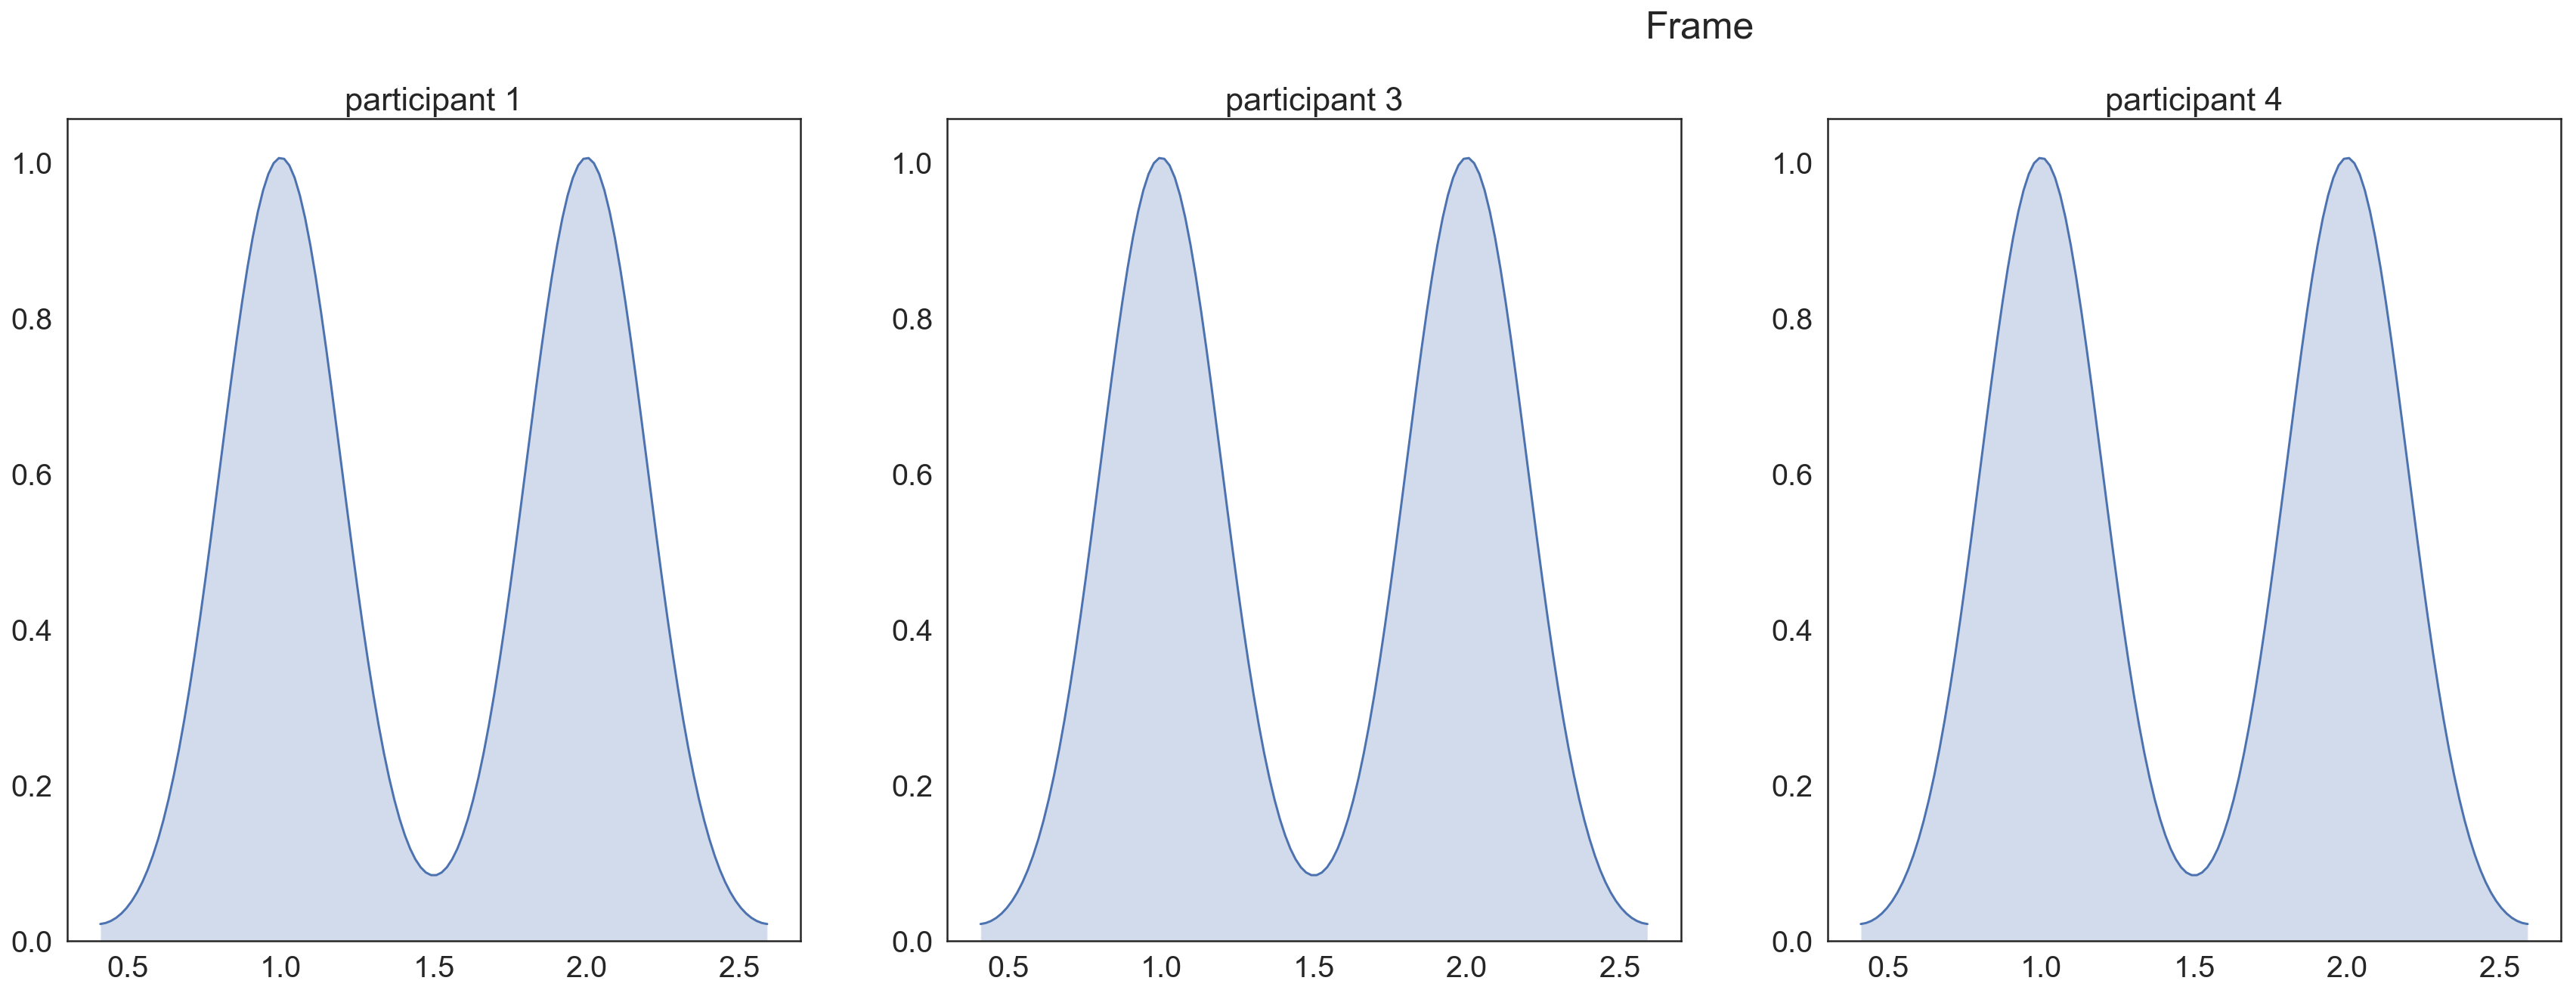

In [66]:
participant_densities(data_exp1,'frame',title = 'Frame')

#### This plot is just to check if I am presenting a comparable number of trials for each frames (in some cases is different because participants can miss the response)

## 2. accuracy per participant

In [67]:
accuracies = pd.DataFrame( columns = [])

In [68]:
accuracy_like = []
accuracy_dislike = []

for i in data_exp1.Part.unique():
    print(i)
    accuracy_like.append(data_exp1.loc[(data_exp1['frame'] == 1) & (data_exp1['Part'] == i)].correct1.mean())
    print(accuracy_like)

    accuracy_dislike.append(data_exp1.loc[(data_exp1['frame'] == 2) & (data_exp1['Part'] == i)].correct1.mean())
    print(accuracy_dislike)


accuracies['participant'] = range(len(data_exp1.Part.unique()))
accuracies['like'] = accuracy_like
accuracies['dislike'] = accuracy_dislike

1
[0.8888888888888888]
[0.8611111111111112]
3
[0.8888888888888888, 0.8888888888888888]
[0.8611111111111112, 0.9583333333333334]
4
[0.8888888888888888, 0.8888888888888888, 1.0]
[0.8611111111111112, 0.9583333333333334, 1.0]


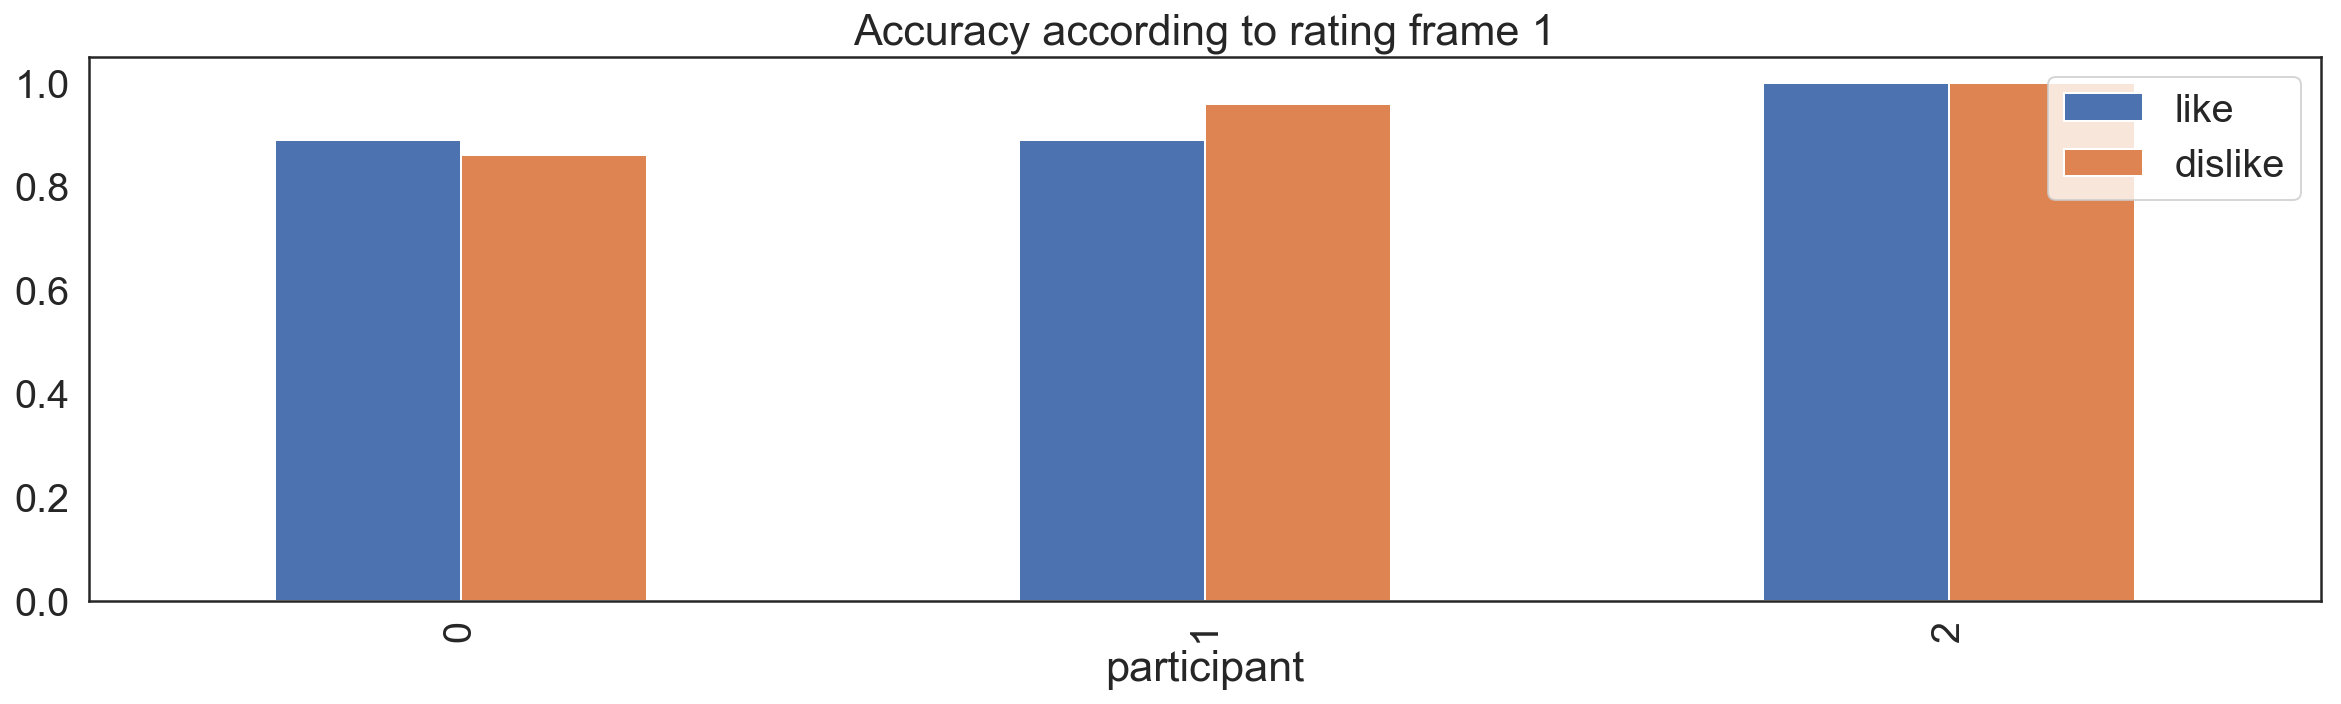

In [69]:
accuracies.plot.bar(x='participant',y=['like','dislike'], figsize=(20,5),title = 'Accuracy according to rating frame 1')

In [70]:
accuracies = pd.DataFrame( columns = [])

In [71]:
accuracy_like = []
accuracy_dislike = []

for i in data_exp1.Part.unique():
    print(i)
    accuracy_like.append(data_exp1.loc[(data_exp1['frame'] == 1) & (data_exp1['Part'] == i)].correct2.mean())
    accuracy_dislike.append(data_exp1.loc[(data_exp1['frame'] == 2) & (data_exp1['Part'] == i)].correct2.mean())
    print(accuracy_dislike)
accuracies['participant'] = range(len(data_exp1.Part.unique()))
accuracies['like'] = accuracy_like
accuracies['dislike'] = accuracy_dislike

1
[0.875]
3
[0.875, 0.8194444444444444]
4
[0.875, 0.8194444444444444, 0.0]


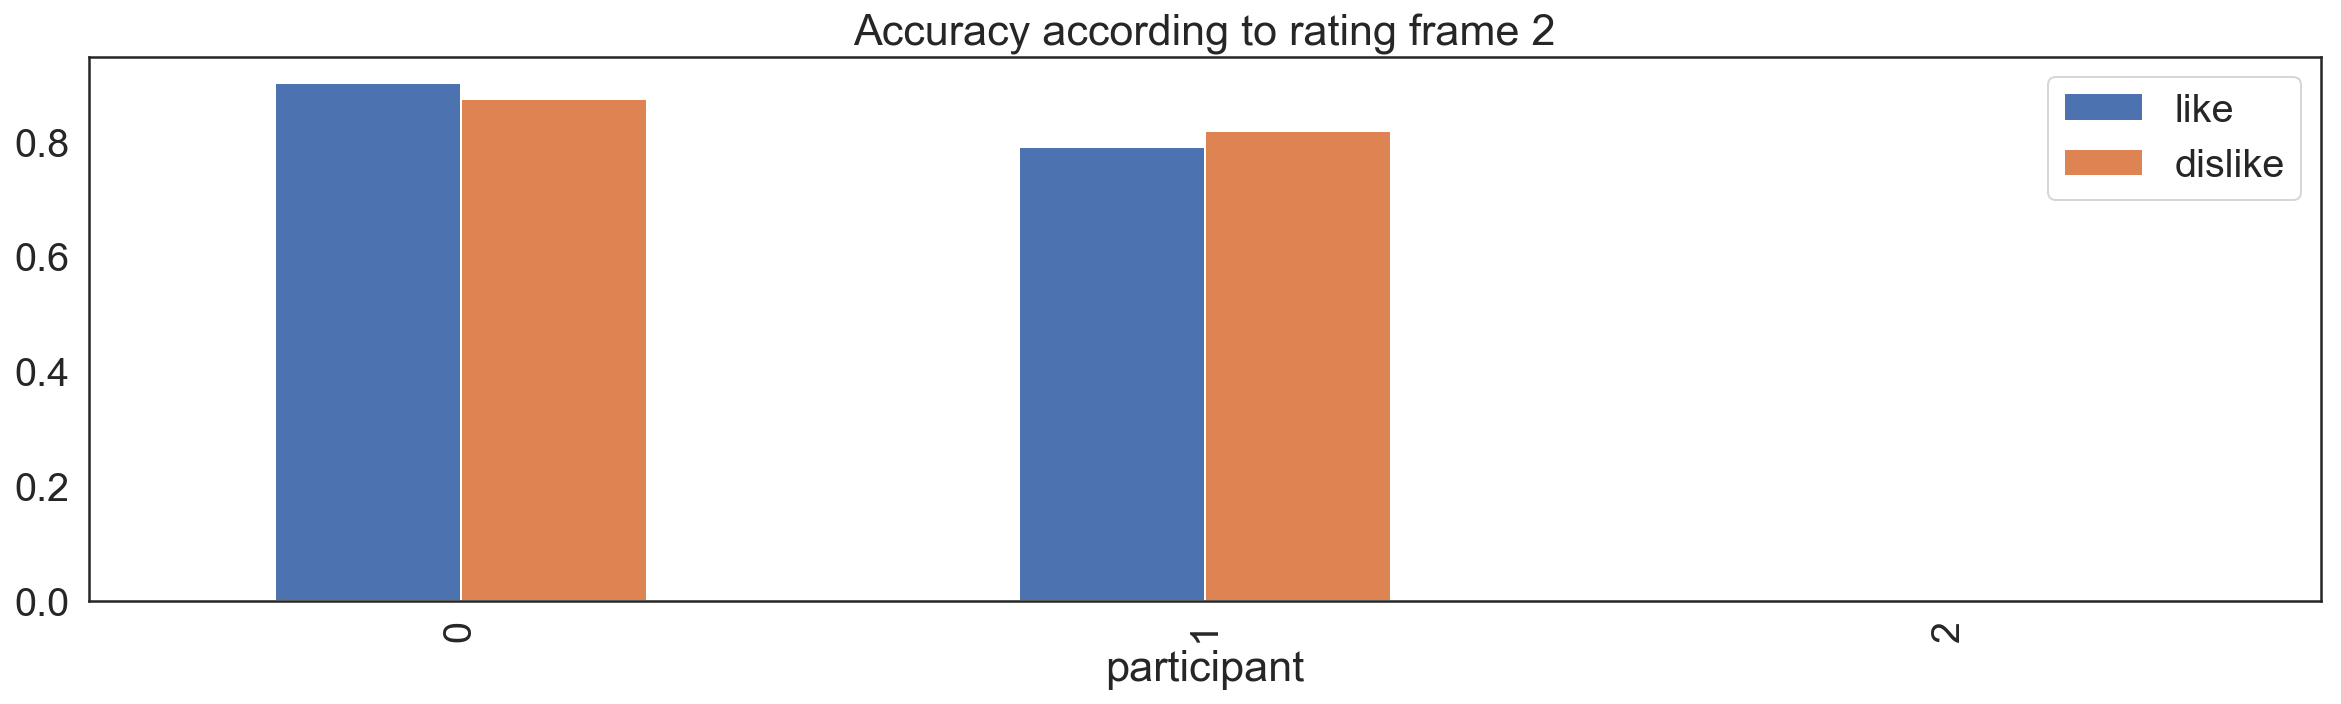

In [72]:
 accuracies.plot.bar(x='participant',y=['like','dislike'], figsize=(20,5),title = 'Accuracy according to rating frame 2')

## * Participant 4 didn't report ratings correctly for dislike frame (i.e. reported how much he liked the pet in both cases)

## Split dataframe for like and dislike

In [73]:
data_expL = data_exp1.loc[(data_exp1['frame'] == 1)] # 1 = Like, 2 = Dislike
data_expD = data_exp1.loc[(data_exp1['frame'] == 2)] # 1 = Like, 2 = Dislike

In [74]:
#data_expL = data_exp1.loc[(data_exp1['frame'] == 1) & (data_exp1['Part'] == 4)] # 1 = Like, 2 = Dislike
#data_expD = data_exp1.loc[(data_exp1['frame'] == 2) & (data_exp1['Part'] == 4)] # 1 = Like, 2 = Dislike

## 3. relationship between RT and |DV| (using ratings given in LIKE frame)

Pearson's r = -0.087 p =  0.071


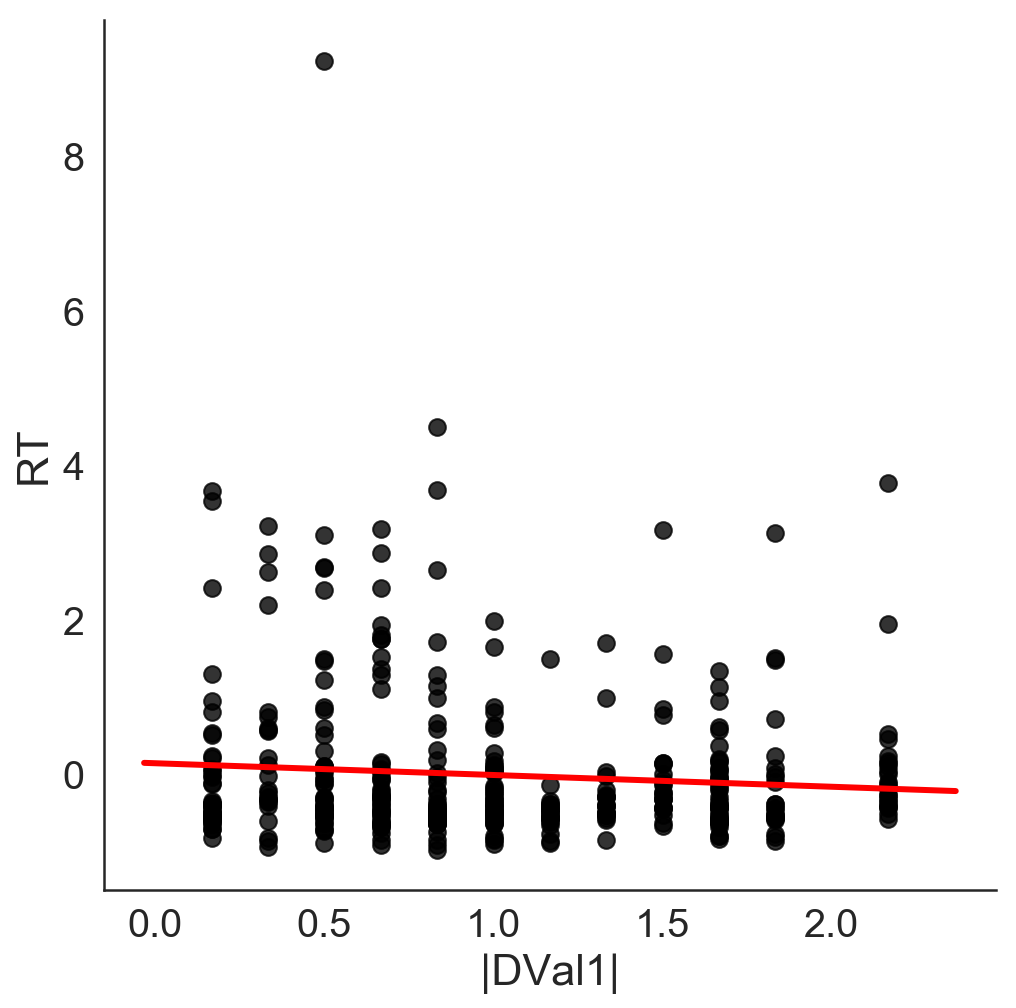

In [75]:
corrPlotSimple(data_exp1, 'absDVal1','|DVal1|','zRT','RT')

## 4. logistic plots for choice in like and dislike frames

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


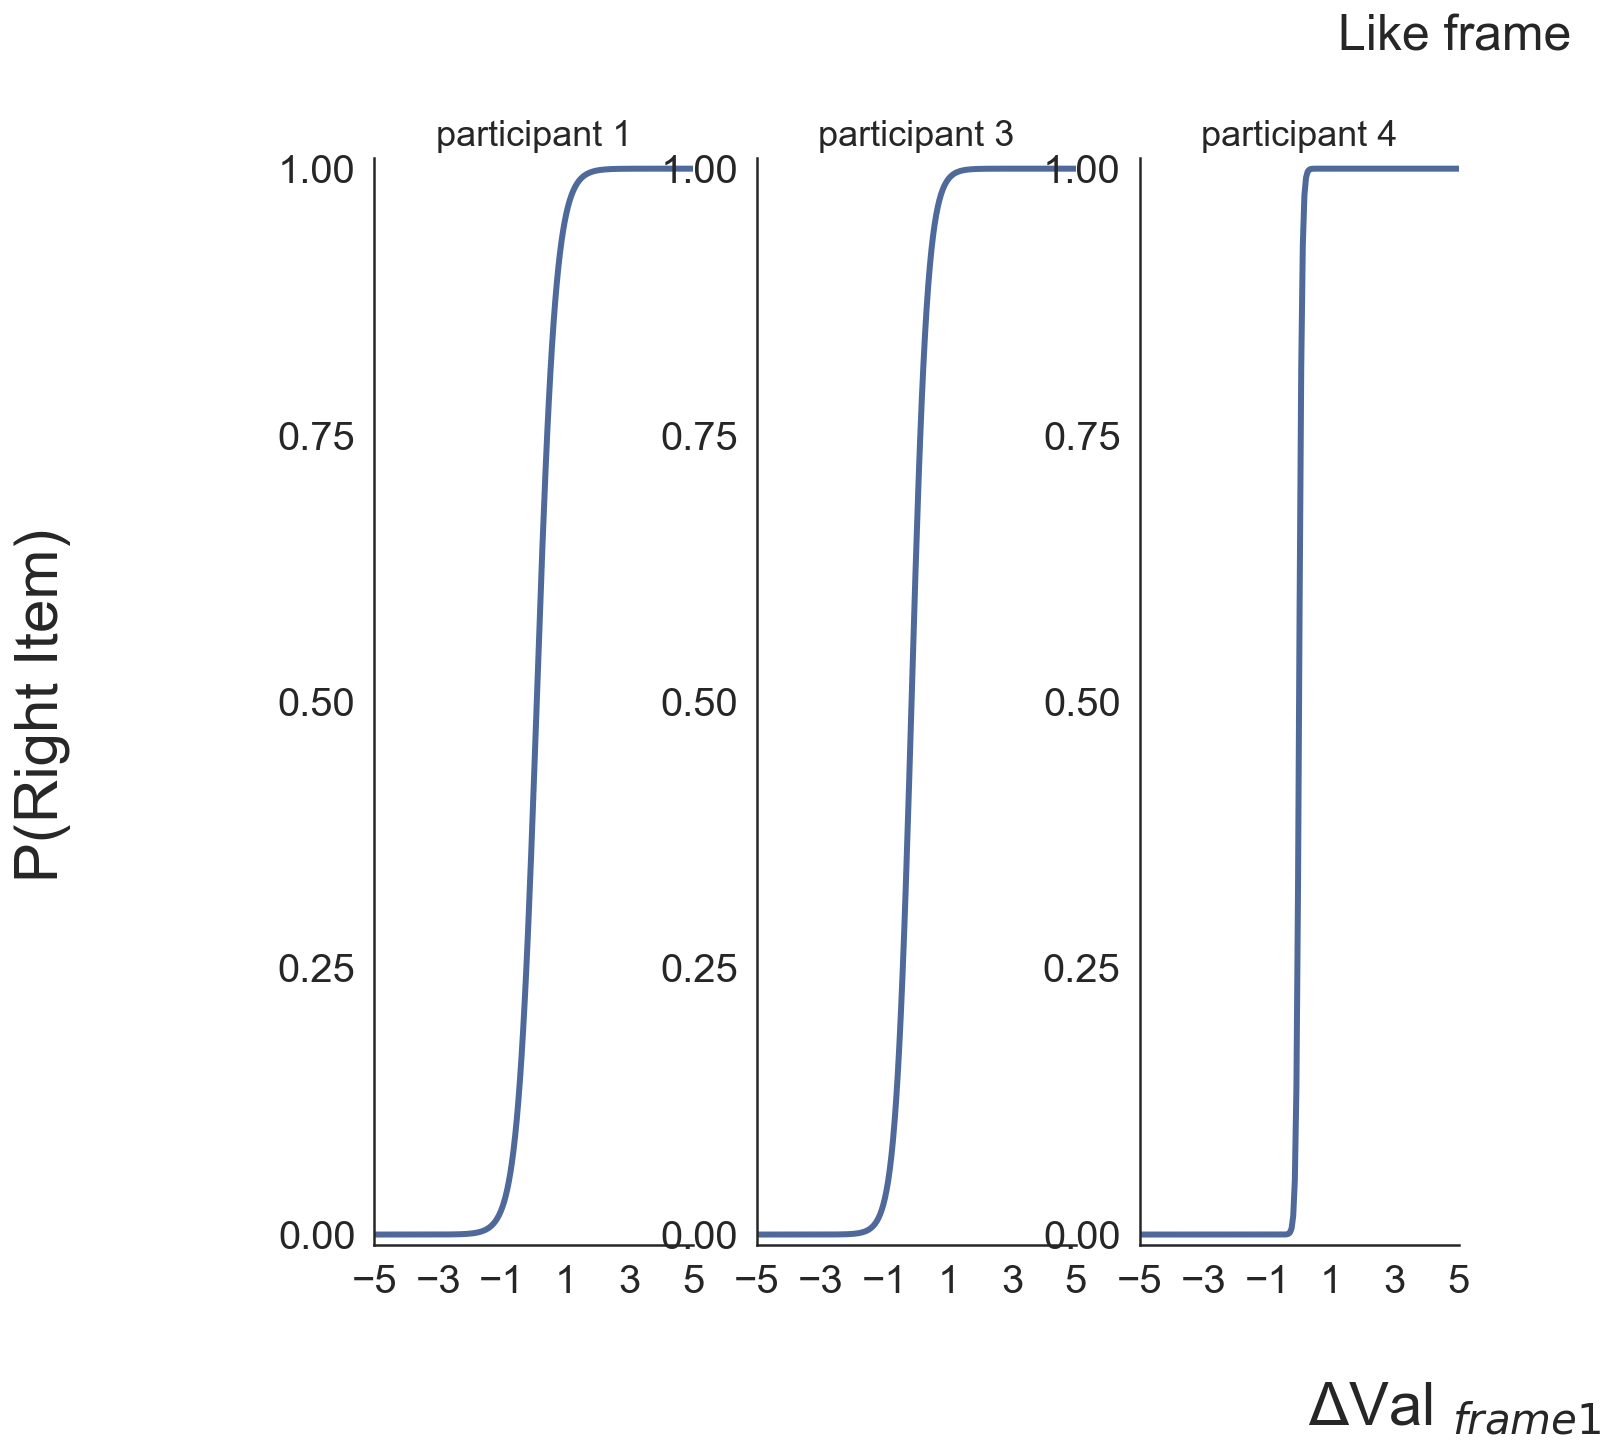

In [76]:
logisticplot_all_part( data=data_expL, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


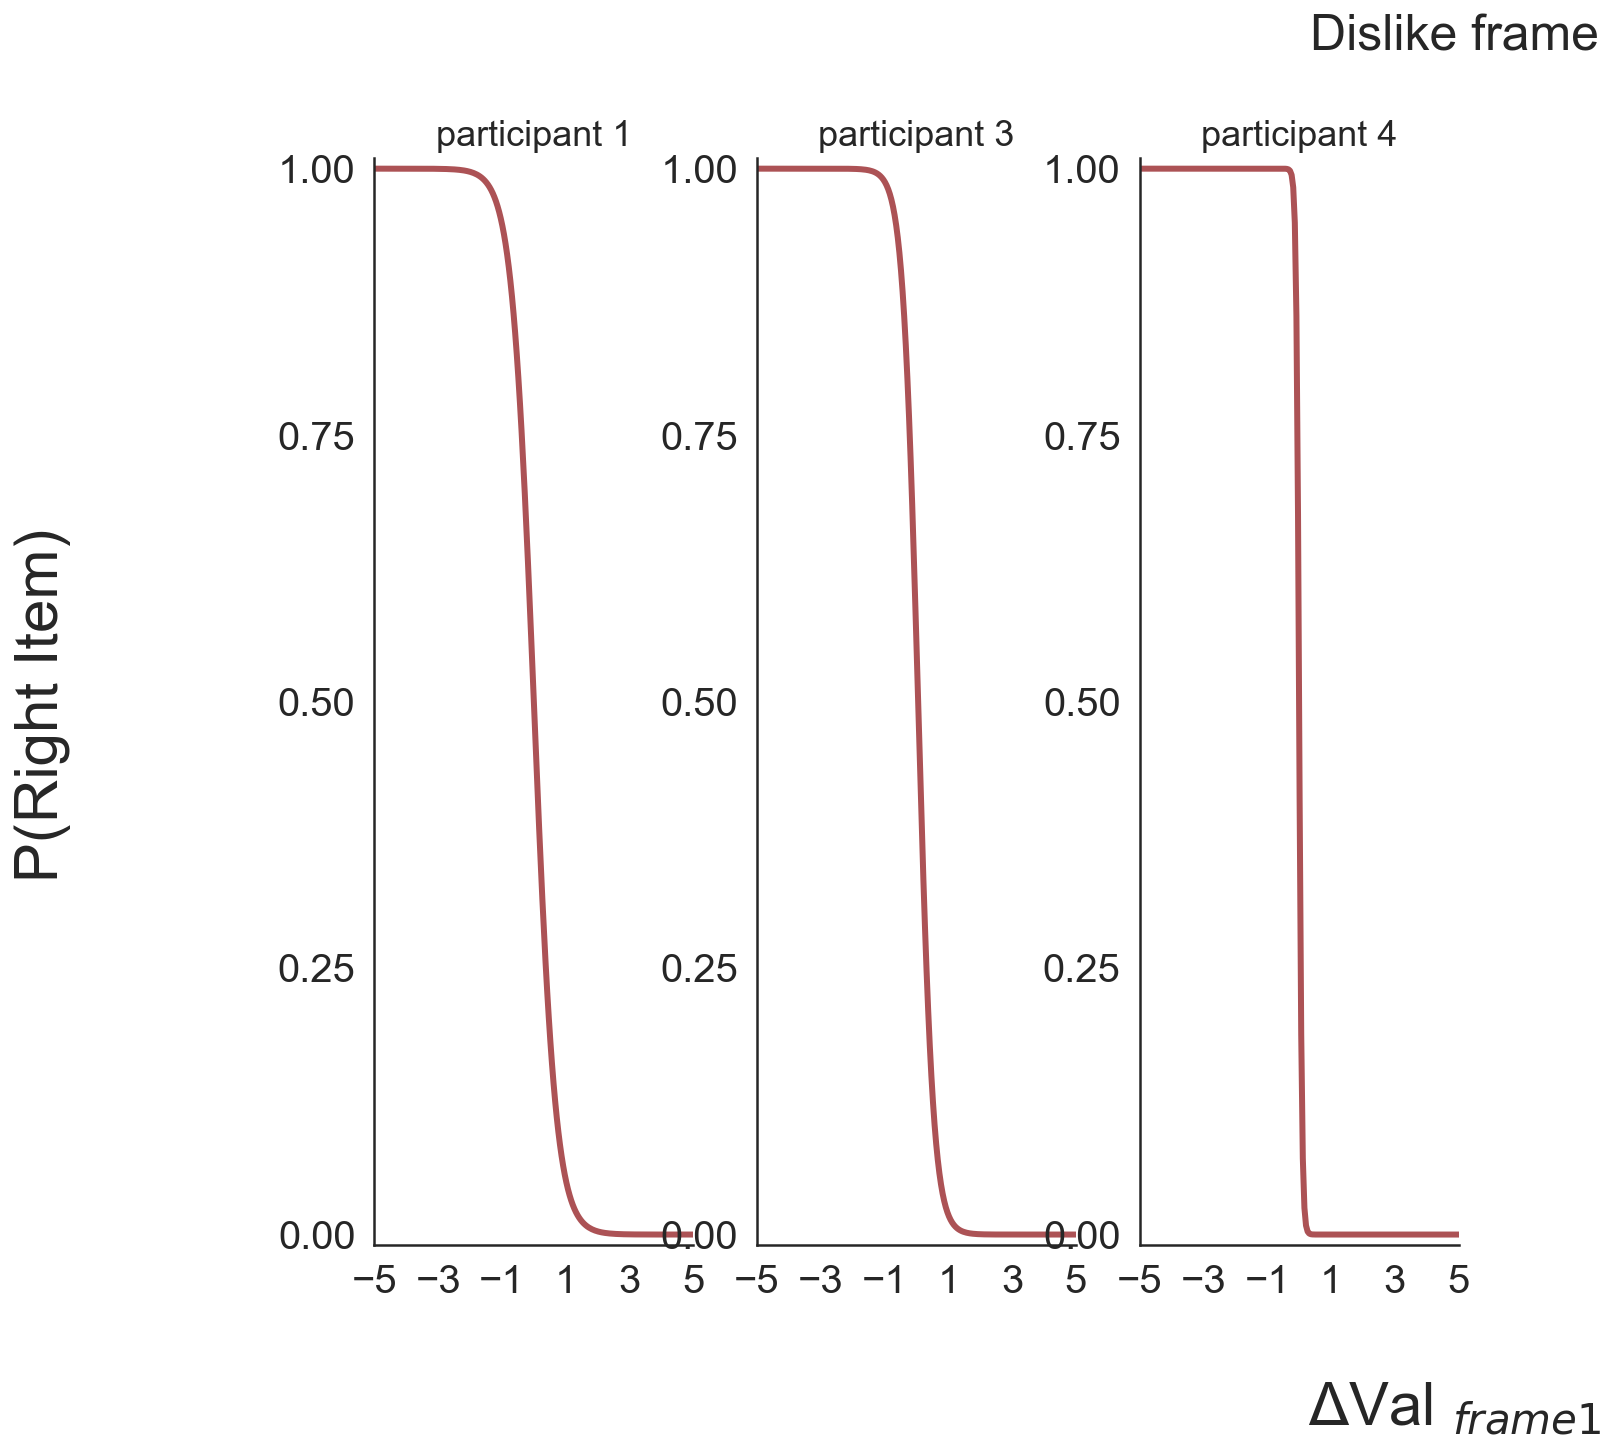

In [77]:
logisticplot_all_part( data=data_expD, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


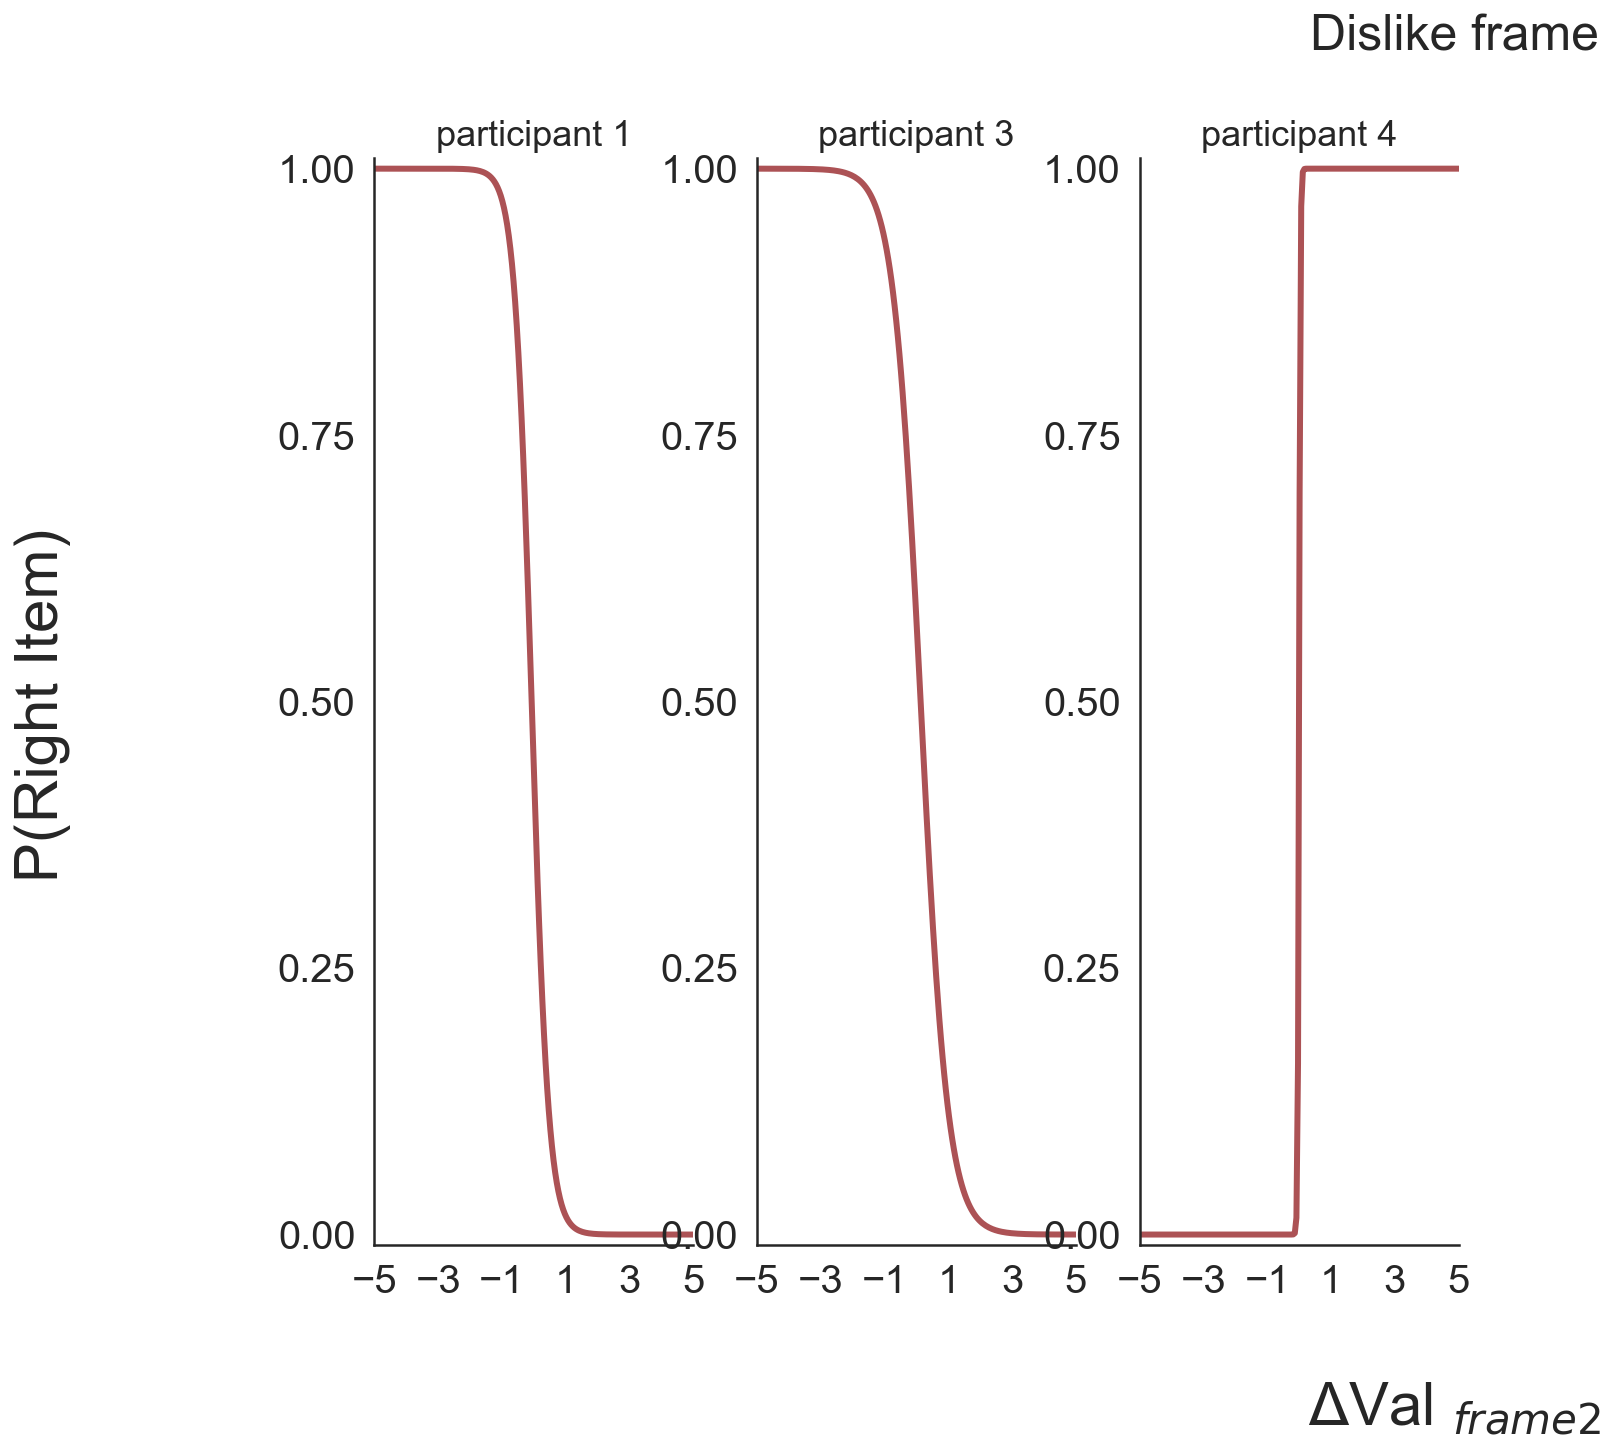

In [78]:
logisticplot_all_part( data=data_expL, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


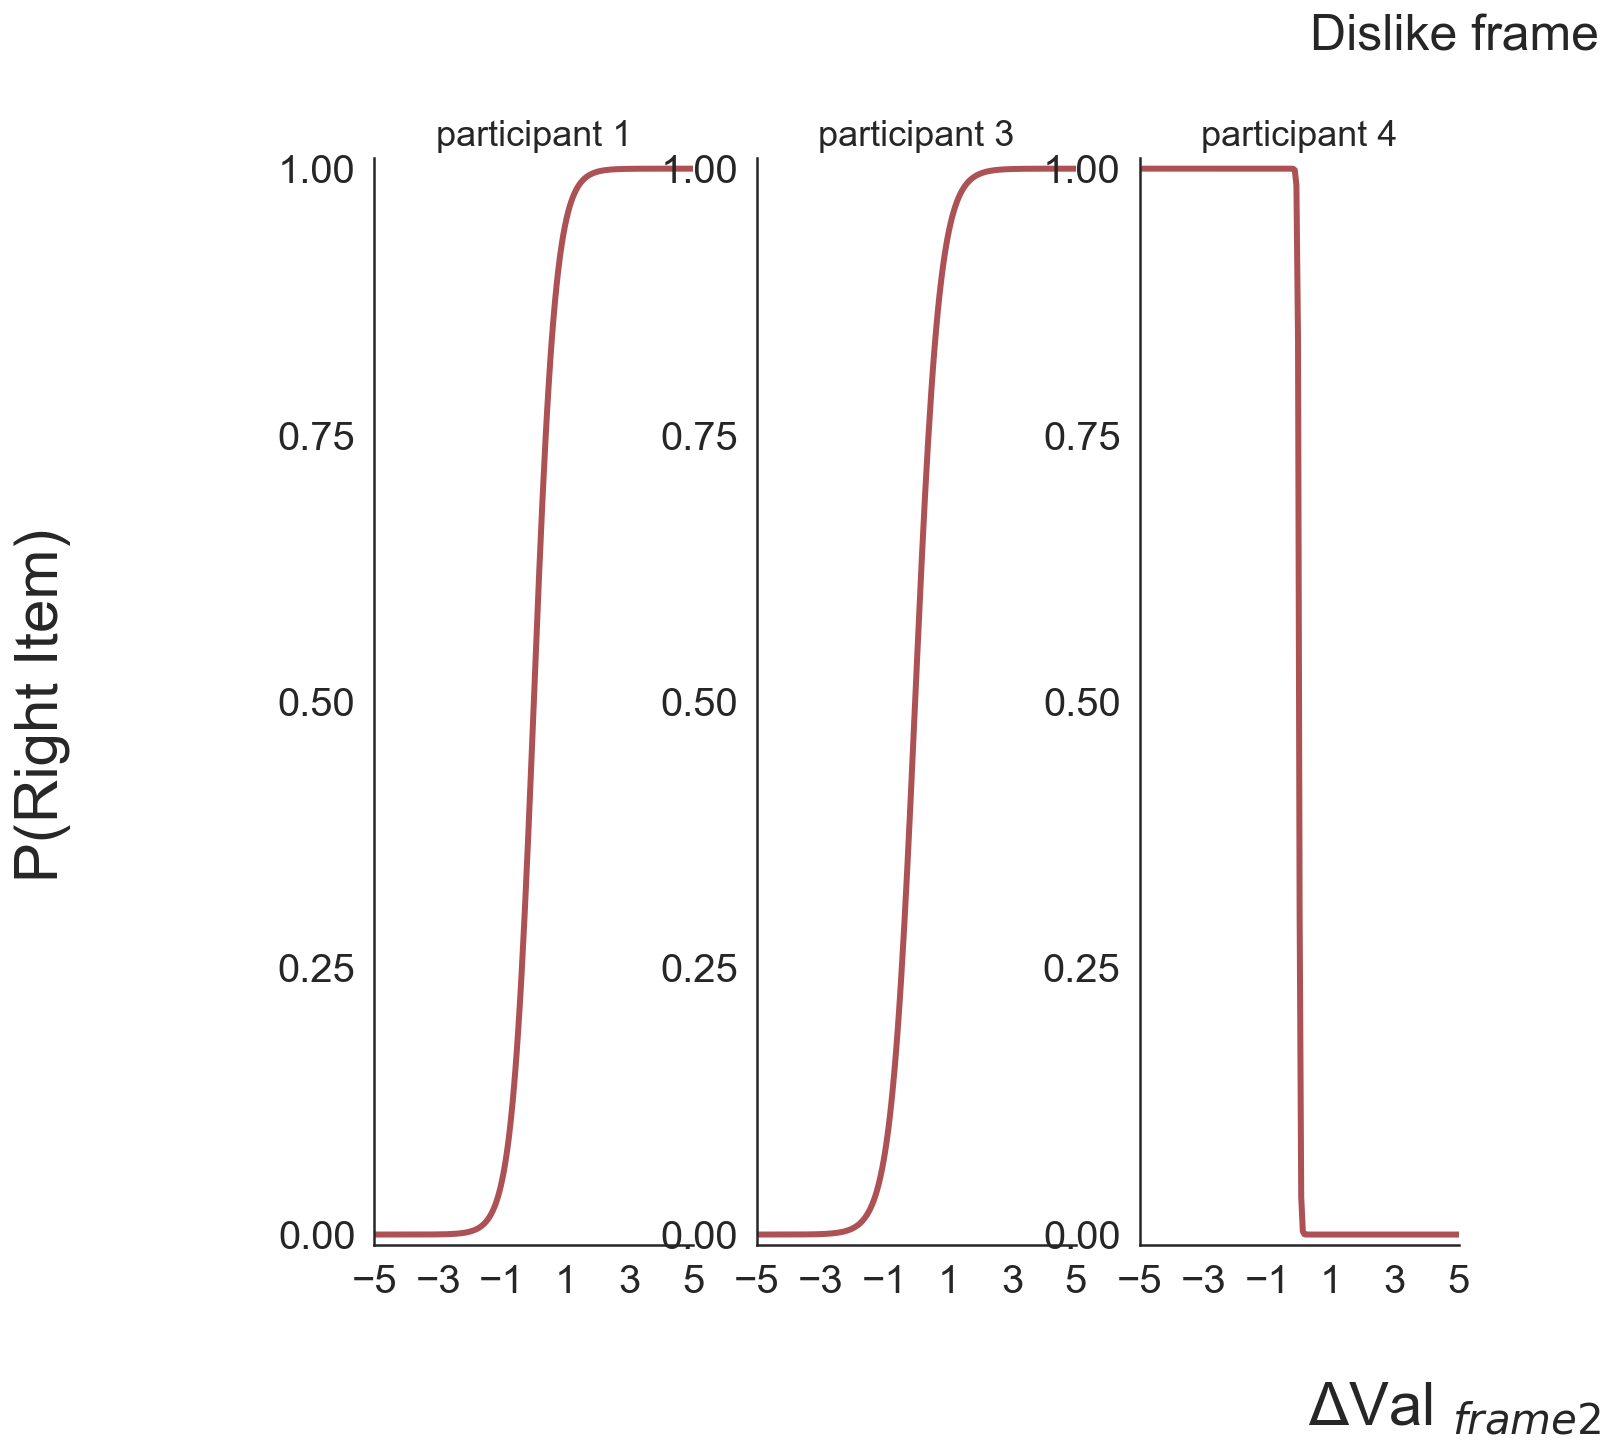

In [79]:
logisticplot_all_part( data=data_expD, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')

## 5. considering logistics plots aggregating all participants

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


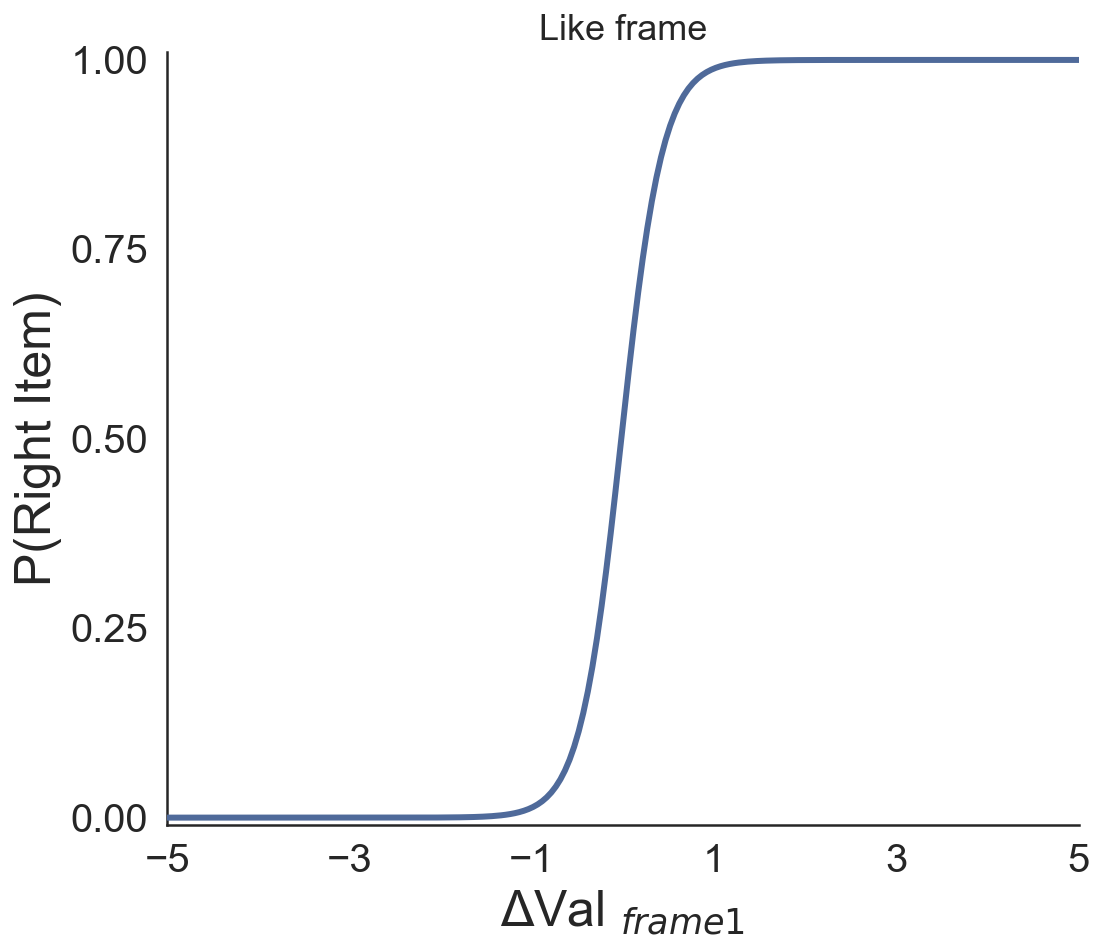

In [80]:
logisticplot_all( data=data_expL, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


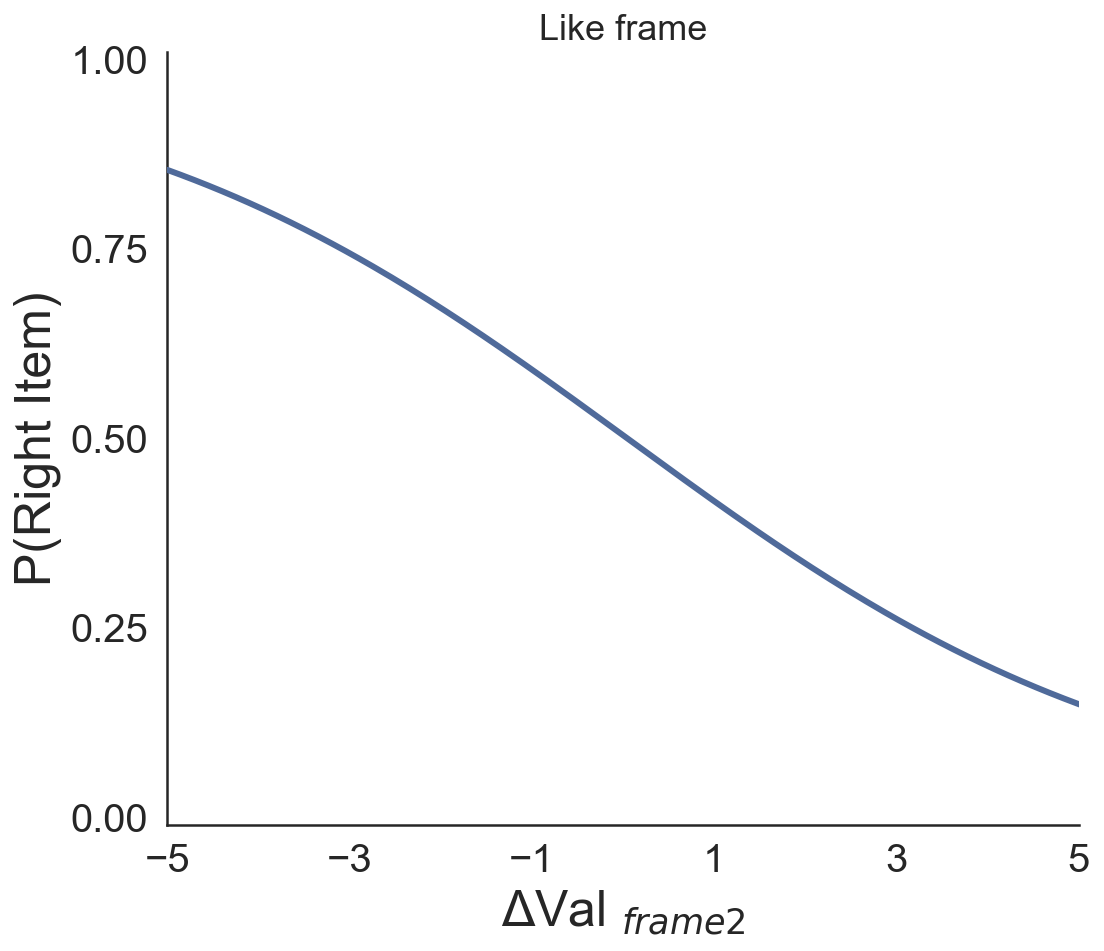

In [81]:
logisticplot_all( data=data_expL, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


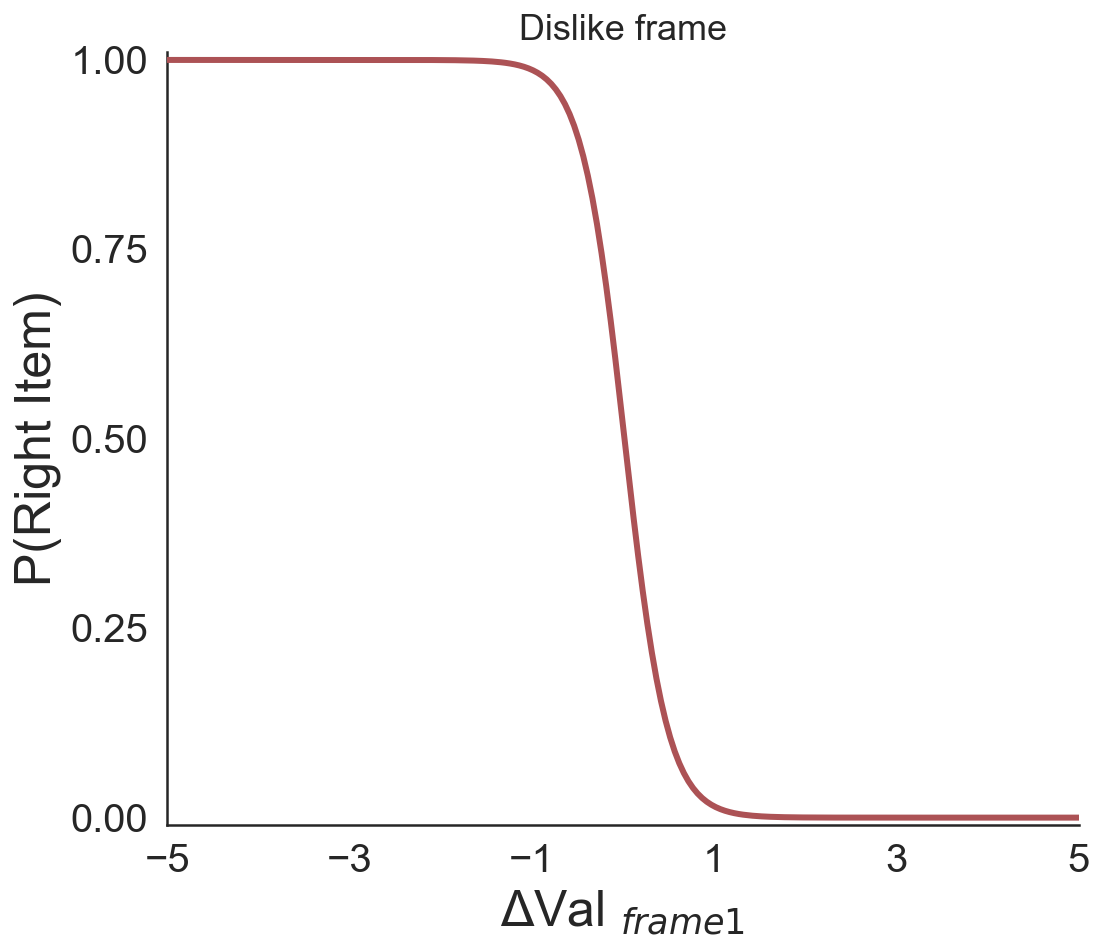

In [82]:
logisticplot_all( data=data_expD, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


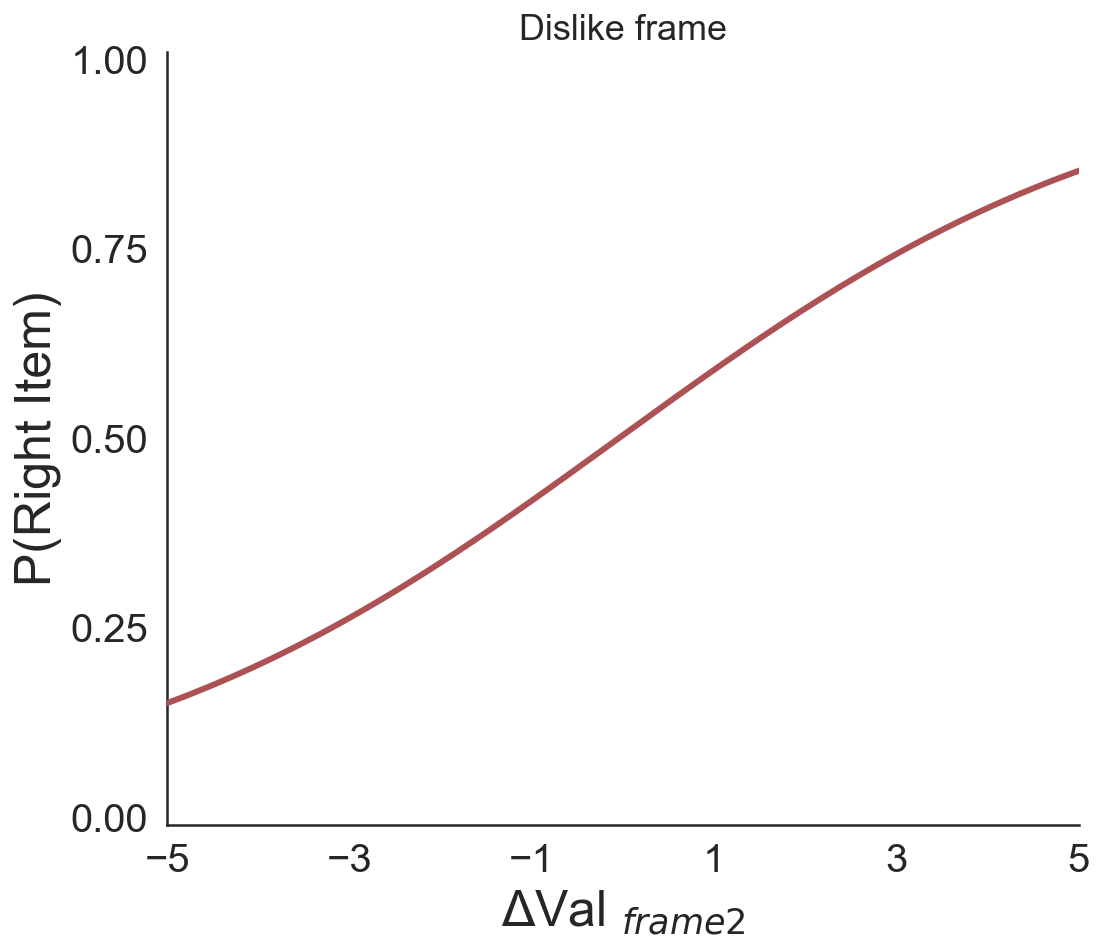

In [83]:
logisticplot_all( data=data_expD, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')
plt.tight_layout()

## 6. (preliminar) regression analysis on Choice
### zDVal1: difference in value (mean ratings for pet right -left) in like frame (frame 1)
### zDVal2: difference in value (mean ratings for pet right -left) in dislike frame (frame 2)
### zDVarX: difference in rating variability (mean variability pet right -left)  in frame X


In [84]:
%R -i data_exp1
data_exp1

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


,index,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,...,zDVar1,zabsDVar1,zDVar2,zabsDVar2,zTotVal1,zTotVal2,zRT,correct1,correct2,choices
0,0,2.500000,2.333333,0.836660,0.816497,1,3.333333,1.666667,0.816497,0.816497,...,-0.035416,-1.091980,-3.948364e-18,-1.099702,1.404879,-1.260252,4.500372,1,1,1
1,1,3.333333,1.666667,0.816497,0.816497,1,2.500000,2.333333,0.836660,0.816497,...,0.035416,-1.091980,-3.948364e-18,-1.099702,1.404879,-1.260252,0.192037,0,0,0
2,2,3.333333,1.666667,0.816497,0.816497,1,2.500000,2.333333,0.836660,0.816497,...,0.035416,-1.091980,-3.948364e-18,-1.099702,1.404879,-1.260252,-0.375685,1,1,1
3,3,2.000000,2.500000,0.000000,0.547723,1,3.333333,1.666667,0.816497,0.816497,...,1.434129,1.035239,1.376438e+00,0.946217,0.561951,-0.840168,-0.523485,1,1,0
4,4,3.333333,1.666667,0.816497,0.816497,1,2.000000,2.500000,0.000000,0.547723,...,-1.434129,1.035239,-1.376438e+00,0.946217,0.561951,-0.840168,-0.490172,1,1,0
5,5,2.500000,2.333333,0.836660,0.816497,1,2.166667,2.500000,0.752773,0.836660,...,-0.147343,-0.921757,1.032605e-01,-0.946217,-0.561951,0.840168,-0.016393,0,0,1
6,6,2.500000,2.333333,0.836660,0.816497,1,3.333333,1.666667,0.816497,0.816497,...,-0.035416,-1.091980,-3.948364e-18,-1.099702,1.404879,-1.260252,-0.491885,1,1,0
7,7,2.500000,2.333333,0.836660,0.816497,1,2.000000,2.500000,0.000000,0.547723,...,-1.469545,1.089101,-1.376438e+00,0.946217,-0.842927,0.840168,0.520445,1,1,1
8,8,2.166667,2.500000,0.752773,0.836660,1,2.000000,2.500000,0.000000,0.547723,...,-1.322202,0.865015,-1.479699e+00,1.099702,-1.404879,1.260252,-0.403908,1,1,1
9,9,2.166667,2.500000,0.752773,0.836660,1,2.500000,2.333333,0.836660,0.816497,...,0.147343,-0.921757,-1.032605e-01,-0.946217,-0.561951,0.840168,2.864374,0,0,0


In [85]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp1[ which(data_exp1$frame=='1'), ]
data_exp1_DisLike <- data_exp1[ which(data_exp1$frame=='2'), ]

[1] "Like BIC:"
[1] 98.19805
[1] "DisLike BIC:"
[1] 101.3954


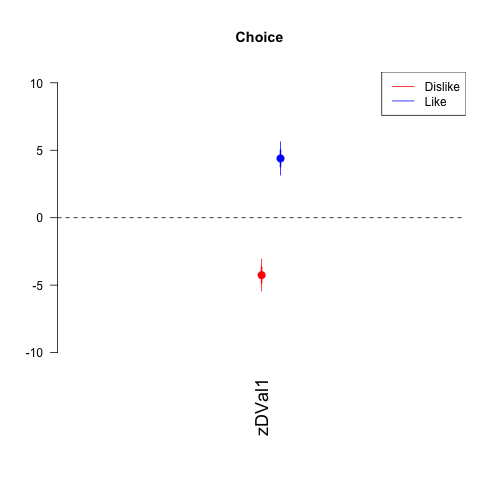

In [86]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal1 , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal1 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-10, 10) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 235.6049
[1] "DisLike BIC:"
[1] 237.3125


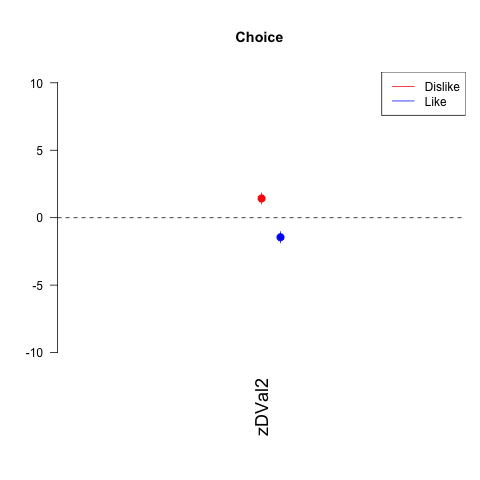

In [62]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal2 , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal2 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-10, 10) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### As expected, we observe that the rating given in dislike frame (Frame 2) accounts for the most disliked option

[1] "Like BIC:"
[1] 117.4728
[1] "DisLike BIC:"
[1] 116.6405


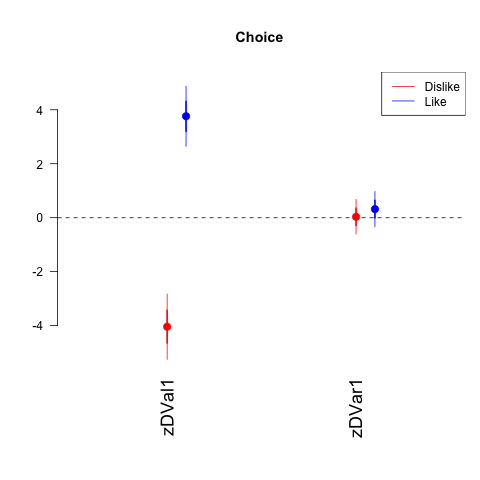

In [63]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal1 + zDVar1  , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal1 + zDVar1  , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-5, 5) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 240.6224
[1] "DisLike BIC:"
[1] 242.6003


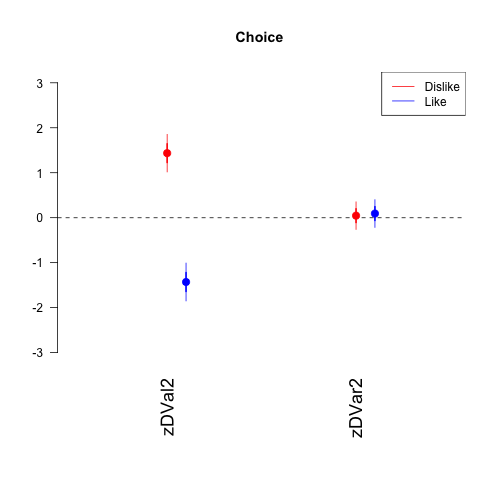

In [64]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal2 + zDVar2  , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal2 + zDVar2  , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### the difference in variability between items seems to not have an effect

## Since I don't have confidence I try to predict RT

[1] "Like BIC:"
[1] 632.6844
[1] "DisLike BIC:"
[1] 611.8806


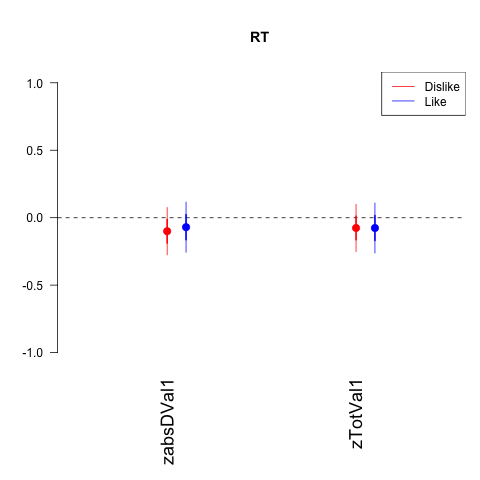

In [65]:
%%R
title_plot = "RT "

ModelChoiceL_1 <- glm(zRT ~ zabsDVal1 + zTotVal1  , data=data_exp1_Like, )
ModelChoiceD_1 <- glm(zRT ~ zabsDVal1 + zTotVal1  , data=data_exp1_DisLike, )

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 632.768
[1] "DisLike BIC:"
[1] 610.5854


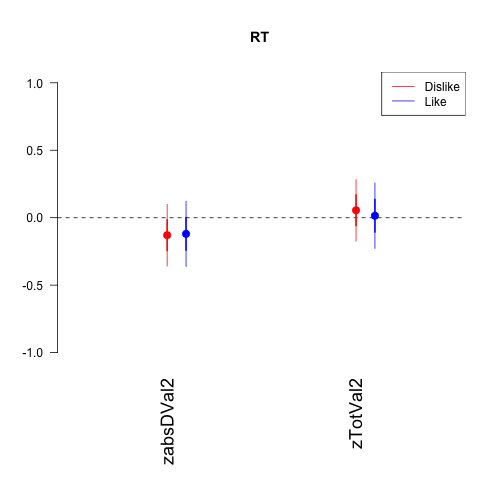

In [66]:
%%R
title_plot = "RT "

ModelChoiceL_1 <- glm(zRT ~ zabsDVal2 + zTotVal2  , data=data_exp1_Like, )
ModelChoiceD_1 <- glm(zRT ~ zabsDVal2 + zTotVal2  , data=data_exp1_DisLike, )

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

-----------------------------------------------------

# Import toolboxes and functions

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def logisticplot_all (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    logit_all = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

   #fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data[xaxis][:, np.newaxis],
            data[yaxis])
    logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    all_coef = clf.coef_
    all_intercept = clf.intercept_
    
    #Plotting the predictive lines
    line_all = sub.plot(X_test, logit_all, color=modlowcol, linewidth=3, zorder=5,linestyle='-')

   # #Plotting the binned data
   # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
   # # determine the x coordinates
   # x_cords= data.groupby('DVBin2')[xaxis].mean()
    
   # # determine low y coordinates
   # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine low y standard errors
   # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
   # # determine high y coordinates
   # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine high y standard errors
   # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
   # # plot the low points
   # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
   # # plot low error bars
   # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
   # # plot the high points
   # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
   # # plot high error bars
   # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=25)
    sub.set_xlabel(xlab, fontsize=25)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    #sub.legend(loc=0, prop={'size':20})
    sns.despine()

In [3]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
 
    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()
    fig = figure(figsize=(20,10))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/6+1), 6, order)

            data_in = data.loc[data['Part'] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [4]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [5]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(40,10))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1
    fig.suptitle(title, fontsize = 25)


In [6]:
def corrPlotSimple(data_exp1, x_variable,x_varlabel,y_variable,y_varlabel):
    
    data_exp1_drop = data_exp1.dropna(subset=[x_variable,y_variable])

    results = pearsonr(data_exp1_drop[x_variable], data_exp1_drop[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_exp1_drop, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    x=data_exp1_drop[x_variable]
    y=data_exp1_drop[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Red', lw=3)
    sns.despine()
    


In [7]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [8]:
%%R
library(lme4)
#library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)